___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 4. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 5. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from tensorflow import keras
import tensorflow as tf



import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (8,6)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
SEED = 42
keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

In [3]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Exploratory Data Analysis

In [4]:
df0 = pd.read_csv('HR_Dataset.csv')

In [5]:
df = df0.copy()
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   
3               0.720            0.870               5                   223   
4               0.370            0.520               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [8]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count           14999.000        14999.000       14999.000   
mean                0.613            0.716           3.803   
std                 0.249            0.171           1.233   
min                 0.090            0.360           2.000   
25%                 0.440            0.560           3.000   
50%                 0.640            0.720           4.000   
75%                 0.820            0.870           5.000   
max                 1.000            1.000           7.000   

       average_montly_hours  time_spend_company  Work_accident      left  \
count             14999.000           14999.000      14999.000 14999.000   
mean                201.050               3.498          0.145     0.238   
std                  49.943               1.460          0.352     0.426   
min                  96.000               2.000          0.000     0.000   
25%                 156.000               3.000          0.000     0.000   
50%                 200.000               3.000          0.000     0.000   
75%                 245.000               4.000          0.000     0.000   
max                 310.000              10.000          1.000     1.000   

       promotion_last_5years  
count              14999.000  
mean                   0.021  
std                    0.144  
min                    0.000  
25%                    0.000  
50%                    0.000  
75%                    0.000  
max                    1.000

In [9]:
df.describe(include='O')

Departments  salary
count         14999  14999
unique           10      3
top           sales    low
freq           4140   7316

In [10]:
df.duplicated().sum()

3008

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [14]:
df.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary']

In [15]:
df.groupby('left').describe().T

left                                0        1
satisfaction_level    count 10000.000 1991.000
                      mean      0.667    0.440
                      std       0.217    0.265
                      min       0.120    0.090
                      25%       0.540    0.110
                      50%       0.690    0.410
                      75%       0.840    0.730
                      max       1.000    0.920
last_evaluation       count 10000.000 1991.000
                      mean      0.716    0.722
                      std       0.162    0.197
                      min       0.360    0.450
                      25%       0.580    0.520
                      50%       0.710    0.790
                      75%       0.850    0.910
                      max       1.000    1.000
number_project        count 10000.000 1991.000
                      mean      3.787    3.883
                      std       0.982    1.817
                      min       2.000    2.000
                      25%       3.000    2.000
                      50%       4.000    4.000
                      75%       4.000    6.000
                      max       6.000    7.000
average_montly_hours  count 10000.000 1991.000
                      mean    198.943  208.162
                      std      45.666   61.295
                      min      96.000  126.000
                      25%     162.000  146.000
                      50%     198.000  226.000
                      75%     238.000  262.500
                      max     287.000  310.000
time_spend_company    count 10000.000 1991.000
                      mean      3.262    3.881
                      std       1.367    0.974
                      min       2.000    2.000
                      25%       2.000    3.000
                      50%       3.000    4.000
                      75%       4.000    5.000
                      max      10.000    6.000
work_accident         count 10000.000 1991.000
                      mean      0.174    0.053
                      std       0.380    0.224
                      min       0.000    0.000
                      25%       0.000    0.000
                      50%       0.000    0.000
                      75%       0.000    0.000
                      max       1.000    1.000
promotion_last_5years count 10000.000 1991.000
                      mean      0.019    0.004
                      std       0.138    0.063
                      min       0.000    0.000
                      25%       0.000    0.000
                      50%       0.000    0.000
                      75%       0.000    0.000
                      max       1.000    1.000

In [16]:
df.groupby('left').describe(include='O').T

left                    0      1
departments count   10000   1991
            unique     10     10
            top     sales  sales
            freq     2689    550
salary      count   10000   1991
            unique      3      3
            top       low    low
            freq     4566   1174

## 2. Data Visualization

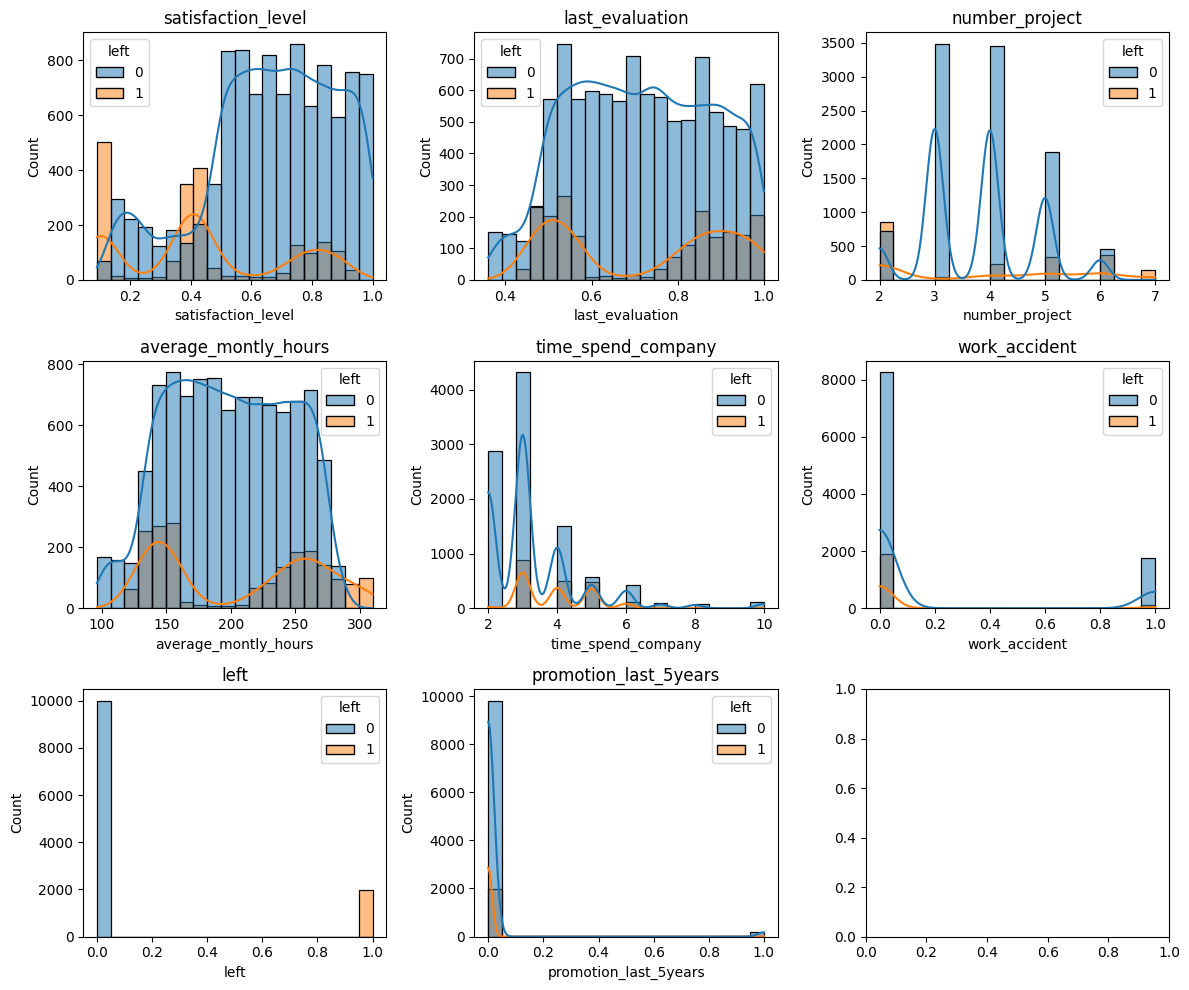

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

axes = axes.flatten()

# Iterate through each column and plot a histogram in the corresponding subplot
for i, column in enumerate(df.select_dtypes('number').columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, bins=20,hue='left', kde=True, ax=ax) 
    ax.set_title(column)
    
plt.tight_layout()

**YORUM**
+ satisfaction_level: 1 ler genelde 3 yerde kümelenmis; 0,0.4,0.8. O yüzden 3 veya 4 e bölünebilinir.
+ last_evaluation: 1 ler yogunlukla 0.4-0.6 ve 0.8-1.0
+ number_project : 1 ler 2,7 de yogun 3 de cok az
+ average_montly_hours: 1 ler 120-160, 210- 290 yogun
+ time_spend_company: 1 ler 3,4,5 de yogun

**COMMENT**

+ **satisfaction_level:** The ones with a satisfaction level of 1 are generally clustered in three places: 0, 0.4, and 0.8. Therefore, they can be divided into 3 or 4 categories.
+ **last_evaluation:** The ones with a last evaluation score of 1 are predominantly in the ranges of 0.4-0.6 and 0.8-1.0.
+ **number_project:** The ones with a number of projects equal to 1 are concentrated at 2 and 7, while there are very few at 3.
+ **average_monthly_hours:** The ones with a number of projects equal to 1 show high density in the ranges of 120-160 and 210-290.
+ **time_spend_company:** The ones with a time spent in the company equal to 1 are concentrated at 3, 4, and 5.

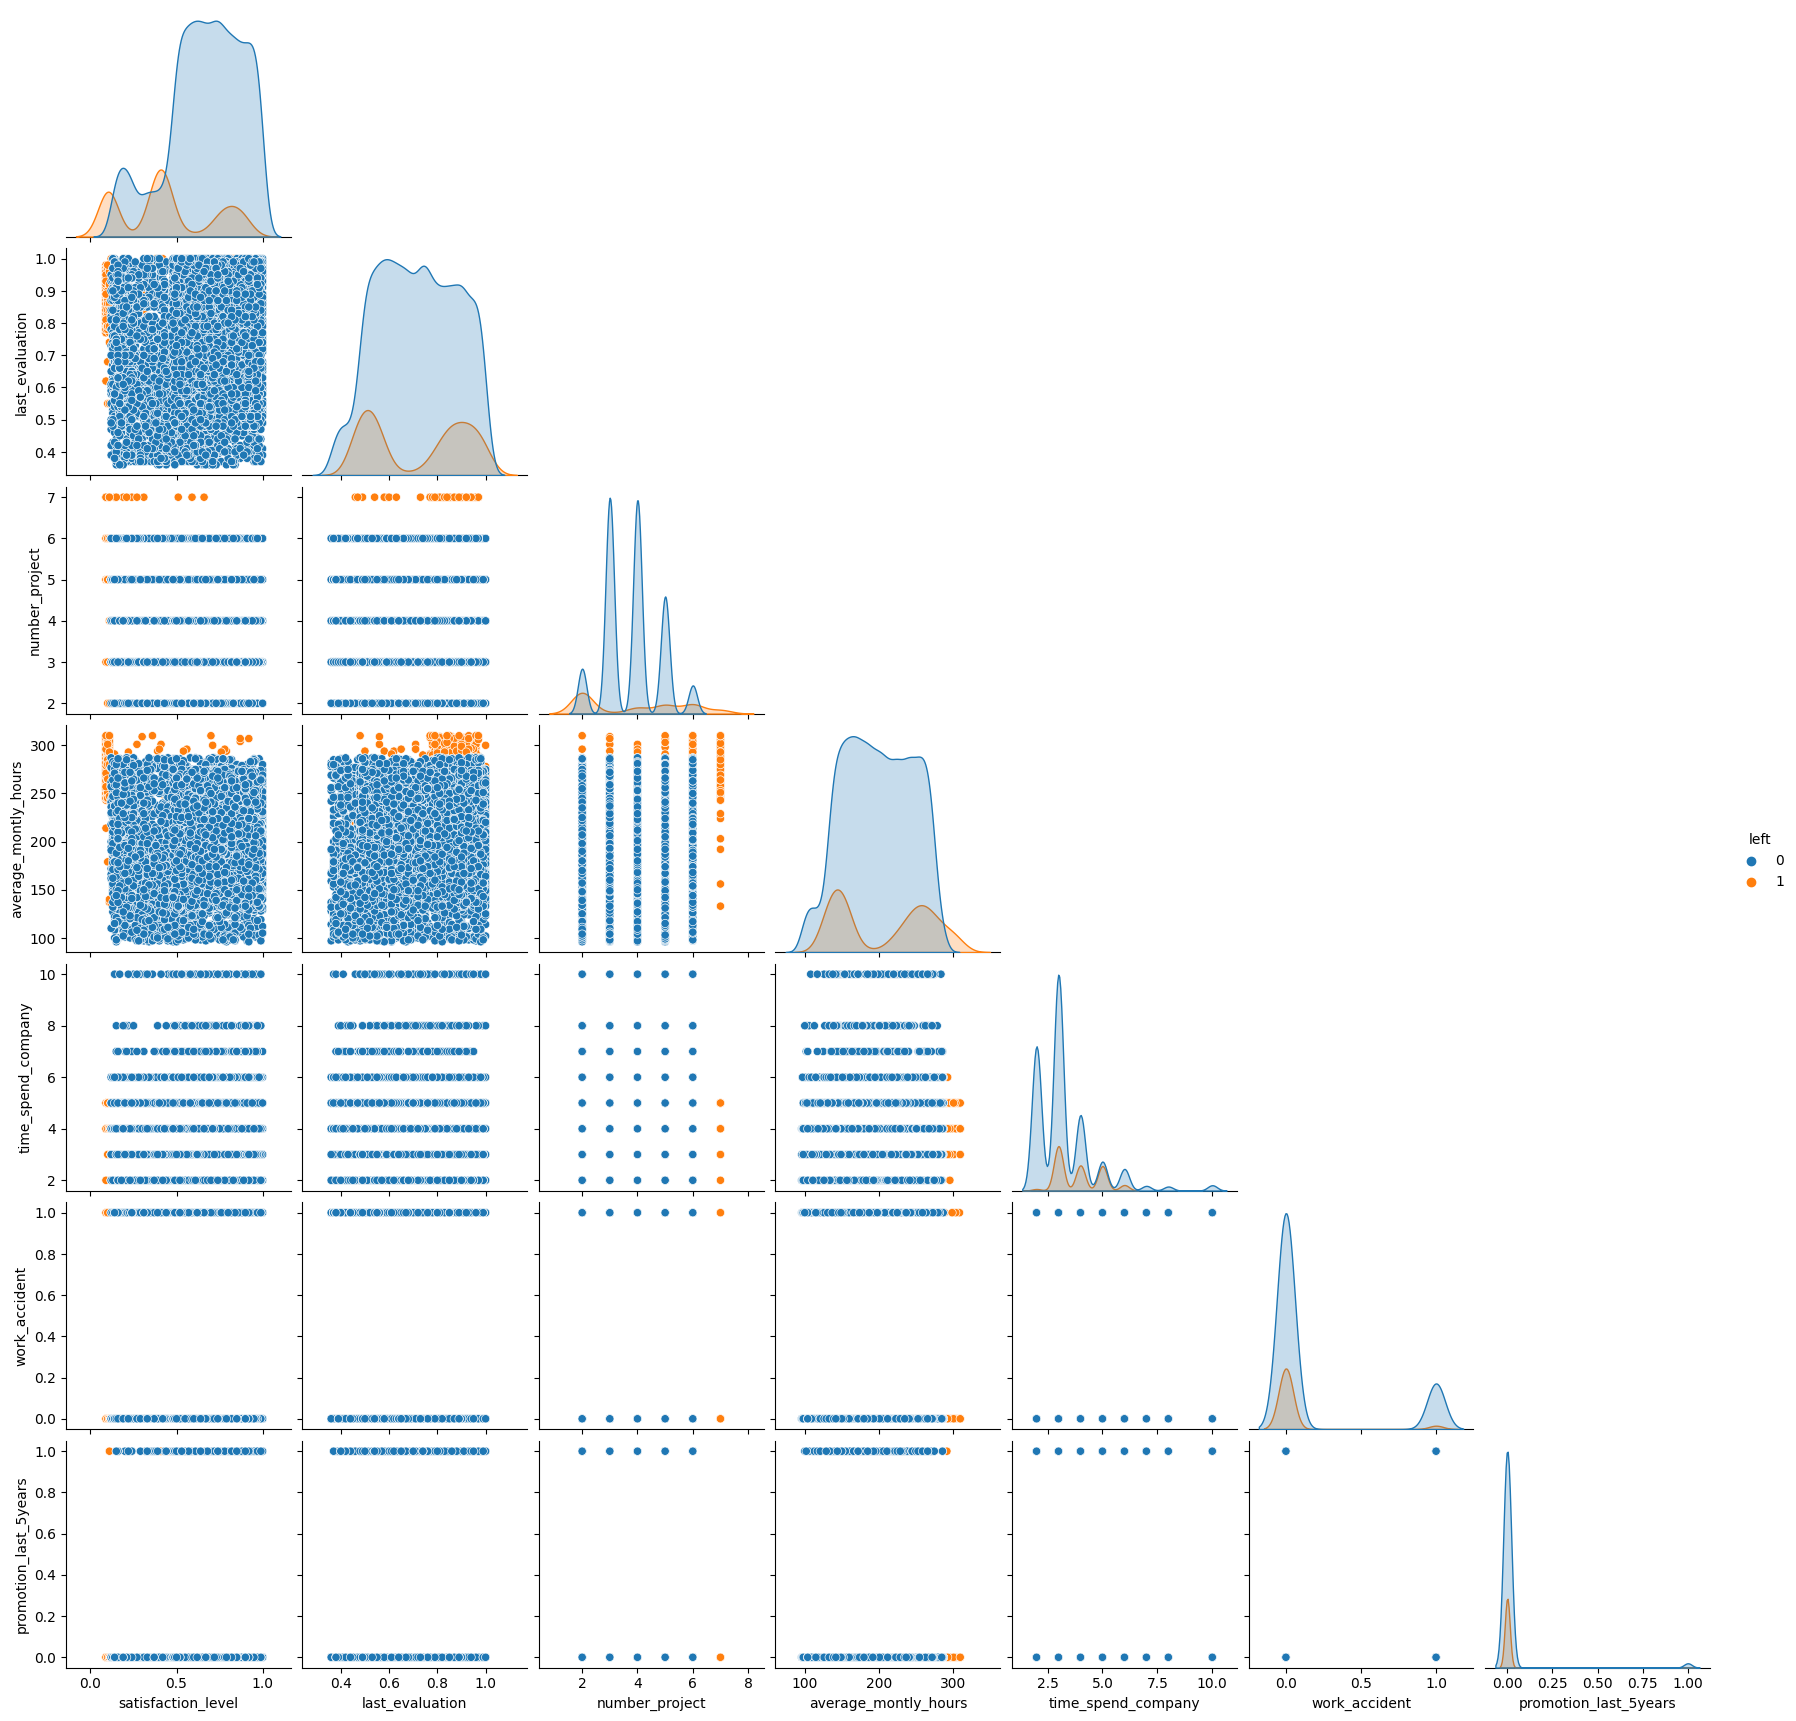

In [18]:
sns.pairplot(df, corner=True, hue='left')
plt.show()

### Target Feature : Left

We will classify whether the employee has left the company or not. Therefore our target is 'left' feature.

### satisfaction_level

<Axes: xlabel='satisfaction_level', ylabel='Count'>

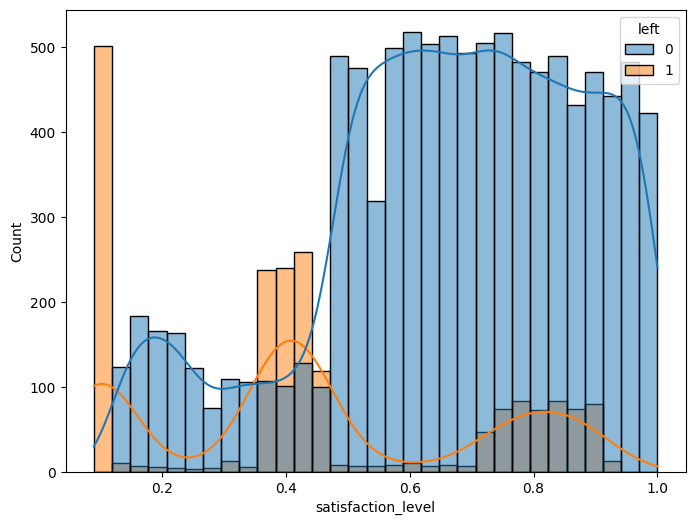

In [19]:
sns.histplot(data=df, x= 'satisfaction_level',hue='left',kde=True)

In [20]:
# sns.swarmplot(x='left', y='satisfaction_level', data=df)
# plt.show()

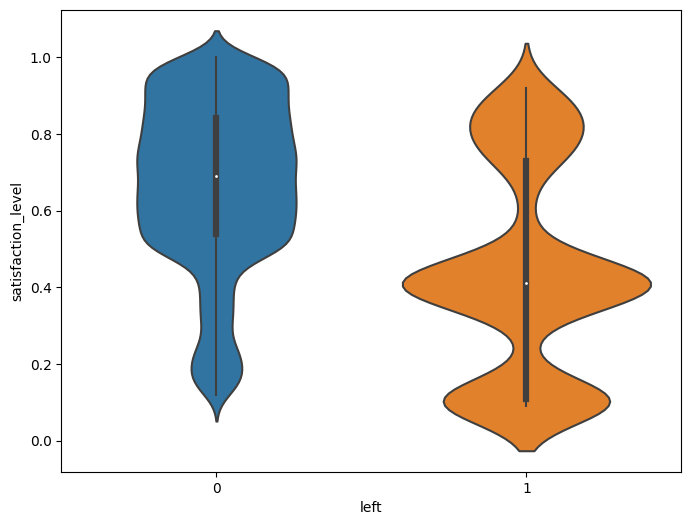

In [21]:
sns.violinplot(x='left', y='satisfaction_level', data=df)
plt.show()

**COMMENT**

+ **satisfaction_level:** The ones with a satisfaction level of 1 are generally clustered in three places: 0.1, 0.4, and 0.9. Therefore, they can be divided into 3 or 4 categories. On the other hand, 0's are concentrated after 0.45. Those with high satisfaction_level are more likely to quit their job.

### last_evaluation

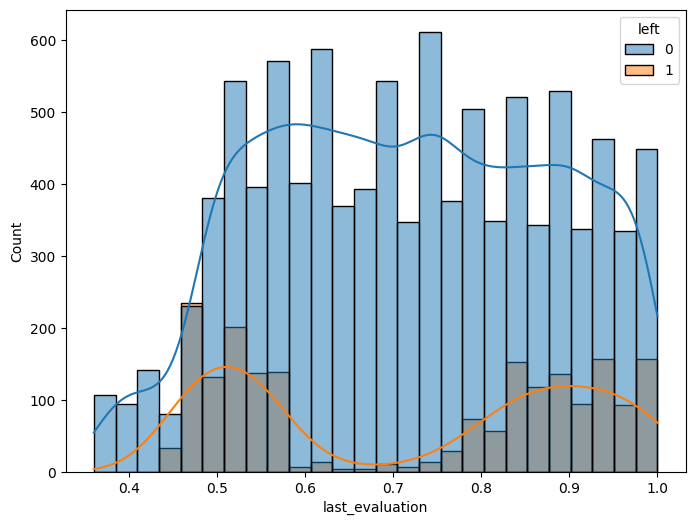

In [22]:
sns.histplot(data=df, x= 'last_evaluation',hue='left',kde=True);

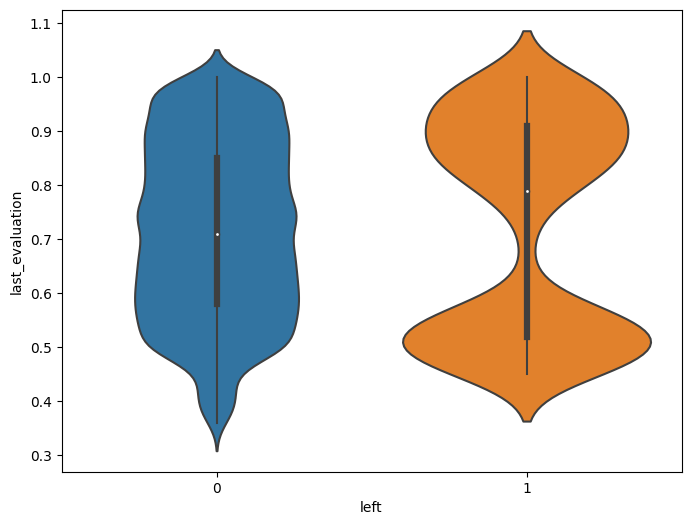

In [23]:
sns.violinplot(x='left', y='last_evaluation', data=df)
plt.show()

**COMMENT**

+ **last_evaluation:** The ones with a last evaluation score of 1 are predominantly in the ranges of 0.4-0.6 and 0.8-1.0. On the other hand, 0's are concentrated between 0.49-1.0.
+ Someone whose last_evaluation is between 0-0.4 is more likely to quit.

### number_projects

In [24]:
# ax = sns.countplot(data=df, x= 'number_project',hue='left')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1]);

In [25]:
# ax = df.groupby('number_project')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.2f');

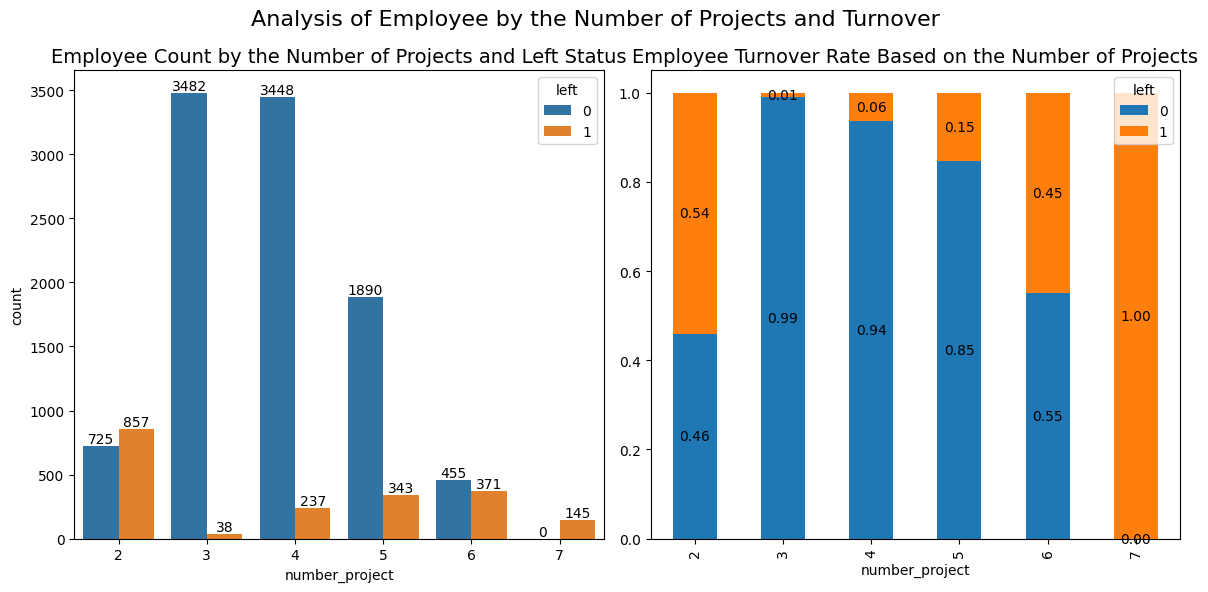

In [26]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Number of Projects and Left Status', size=14)
ax1 = sns.countplot(x='number_project', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('number_project')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
# for i in ax2.containers:
#     ax2.bar_label(i, fmt='%.2f',fontsize=8)
plt.title('Employee Turnover Rate Based on the Number of Projects', size=14)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')

# Overall Title
plt.suptitle('Analysis of Employee by the Number of Projects and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ Those who have 7 projects do not quit their work.
+ 99 % of Employees who have 3 projects quit.
+ 94 % of Employees who have 4 projects quit.
+ 85 % of Employees who have 5 projects quit.
+ Employees with 2 or 6 projects have similar retention or quit rates.

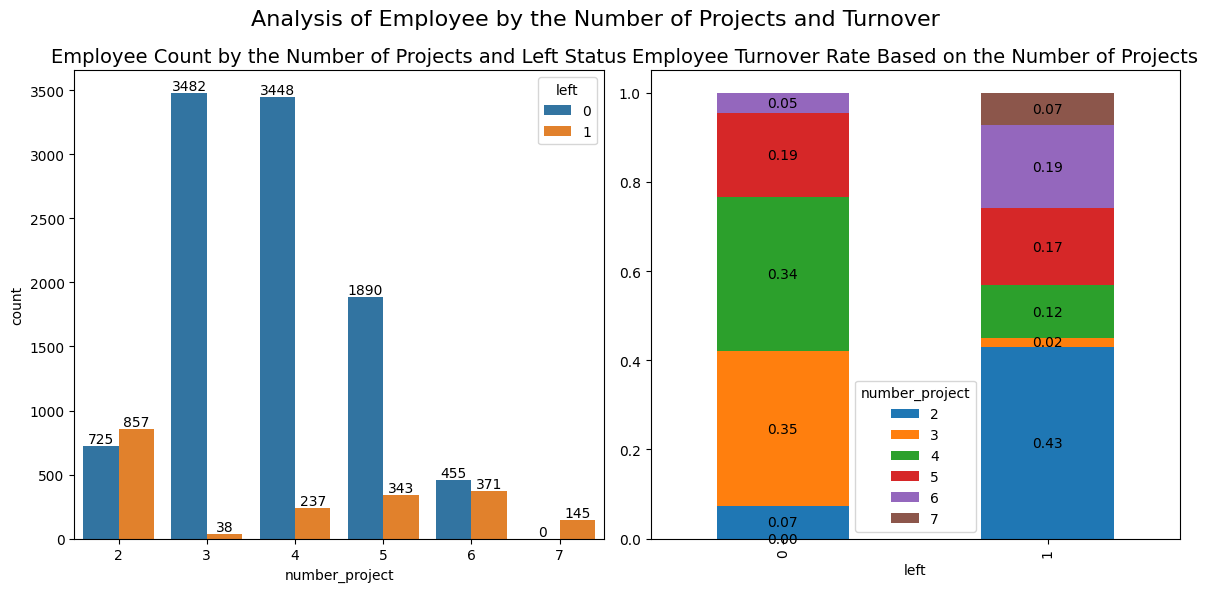

In [27]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Number of Projects and Left Status', size=14)
ax1 = sns.countplot(x='number_project', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['number_project'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax2)
# for i in ax2.containers:
#     ax2.bar_label(i, fmt='%.2f')
plt.title('Employee Turnover Rate Based on the Number of Projects', size=14)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')

# Overall Title
plt.suptitle('Analysis of Employee by the Number of Projects and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 43 % of 1 consist of employees who has 2 projects.
+ 35 % of 0 consist of employees who has 3 projects.
+ 34 % of 0 consist of employees who has 4 projects.

### average_monthly_hours

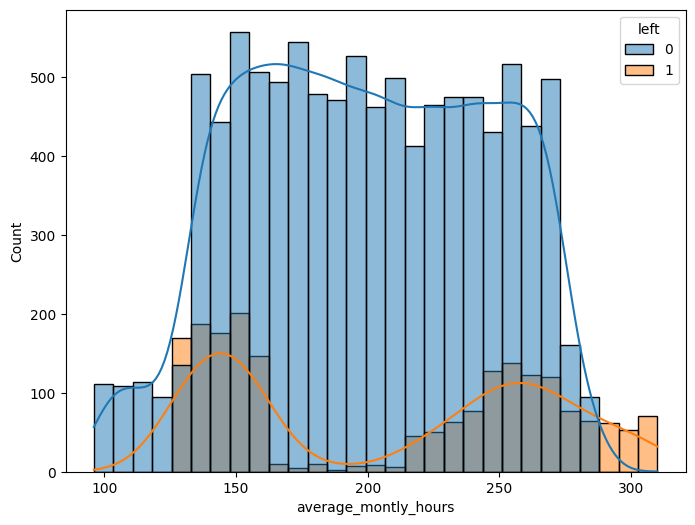

In [28]:
sns.histplot(data=df, x= 'average_montly_hours',hue='left',kde=True);

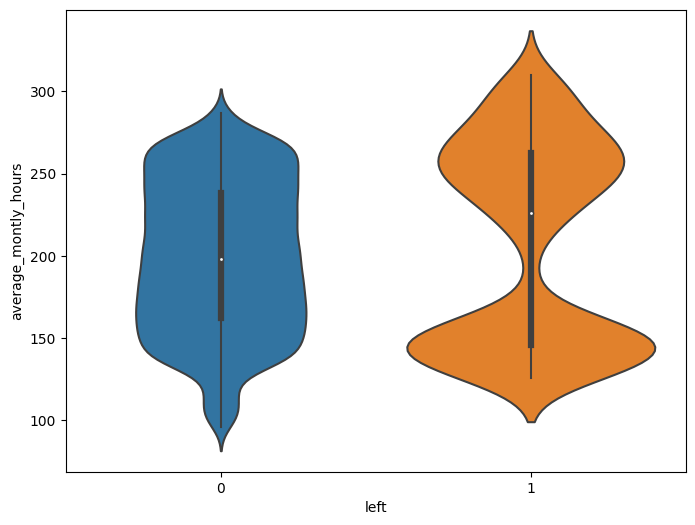

In [29]:
sns.violinplot(x='left', y='average_montly_hours', data=df)
plt.show()

In [30]:
df.average_montly_hours.min()

96

In [31]:
df.average_montly_hours.max()

310

In [32]:
df[df.left==0].average_montly_hours.max()

287

In [33]:
df[df.left==1].average_montly_hours.min()

126

**COMMENT**
+ **average_monthly_hours:** 
+ The ones with a number of projects equal to 1 show high density in the ranges of 119-157 and 213-310.
+ The ones with a number of projects equal to 0 show high density in the range of 125-275.
+ Those who work more than 287 hours a month do not quit.
+ Those who work less than 126 hours a month quit.

### time_spend_company

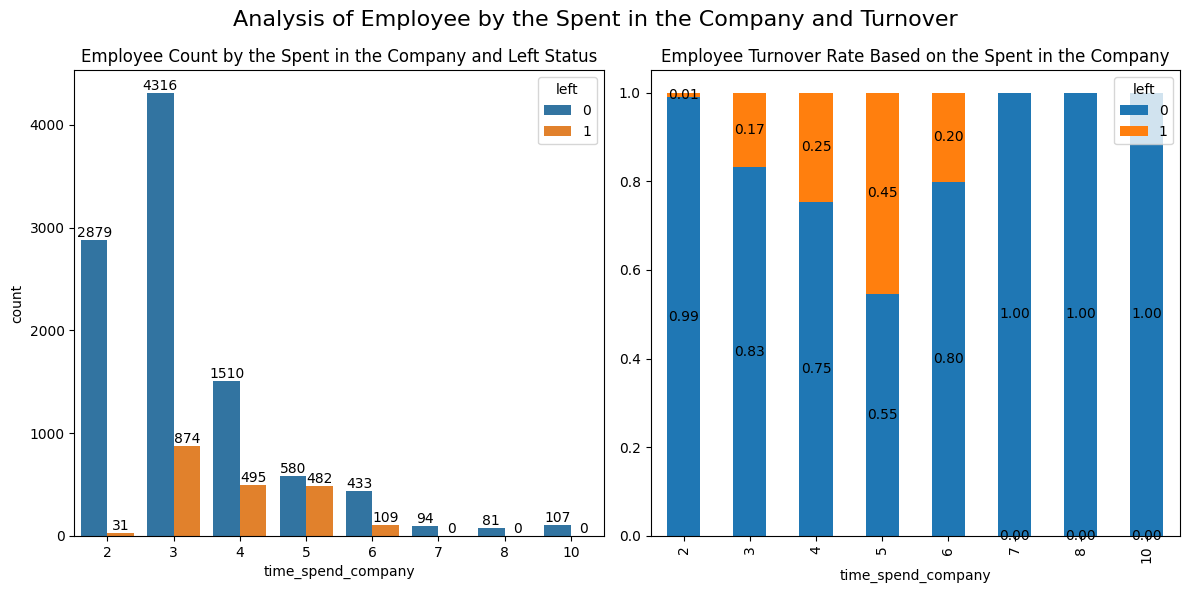

In [34]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Spent in the Company and Left Status', size=12)
ax1 = sns.countplot(x='time_spend_company', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('time_spend_company')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Spent in the Company', size=12)


# Overall Title
plt.suptitle('Analysis of Employee by the Spent in the Company and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ **time_spend_company:** Employees with 7 or more working time spent in the company quit.
+ Employees with 7 or more working time spent in the company quit.
+ Those who didn't quit mostly spent 3,4,5 and 6 working time in the company.
+ 99% of the employees who has 2 time_spent_company quit their jobs.
+ 100% of the employees who has 7,8 or 10 time_spent_company quit their jobs. That means, long-time employees quit.
+ 83% of the employees who has 3 time_spent_company quit their jobs.
+ 80% of the employees who has 6 time_spent_company quit their jobs.
+ 75% of the employees who has 4 time_spent_company quit their jobs.
+ Only 55% of the employees who has 5 time_spent_company quit their jobs. That is, medium-term employees tend to stay.


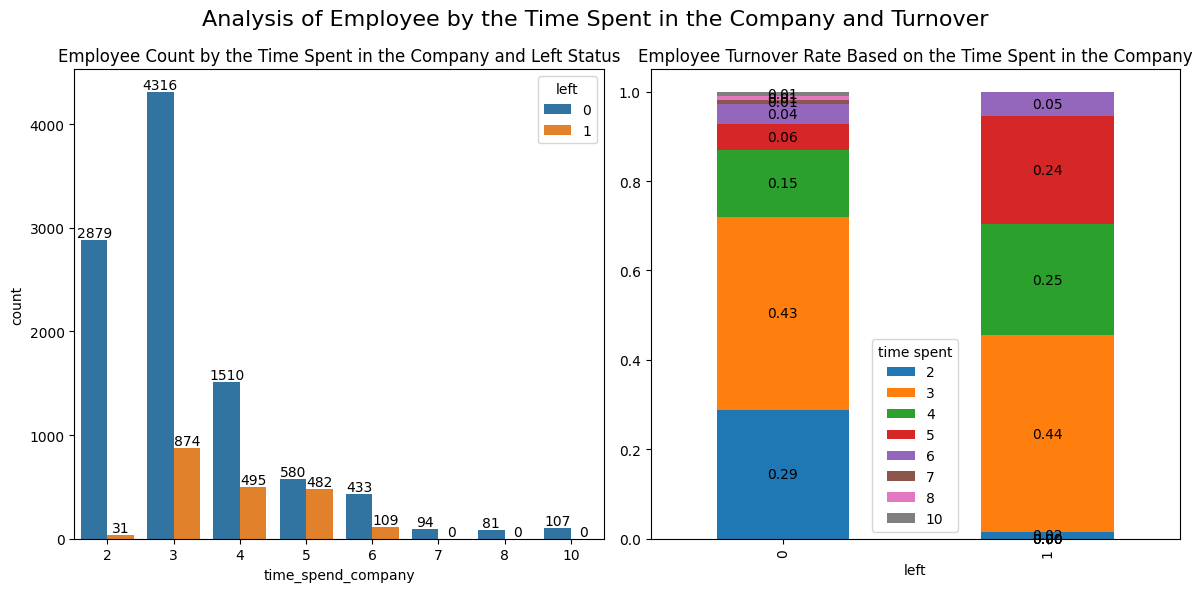

In [35]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Time Spent in the Company and Left Status', size=12)
ax1 = sns.countplot(x='time_spend_company', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
sns.set_palette("tab10")
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['time_spend_company'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
ax2.legend(loc='lower center',title='time spent')

plt.title('Employee Turnover Rate Based on the Time Spent in the Company', size=12)


# Overall Title
plt.suptitle('Analysis of Employee by the Time Spent in the Company and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 43% of employees who quit have 3 time_time_spent
+ 29% of employees who quit have 2 time_time_spent
+ 15% of employees who quit have 4 time_time_spent
+ 44% of employees who do **not** quit have 3 time_time_spent
+ 25% of employees who do **not** quit have 4 time_time_spent
+ 24% of employees who do **not** quit have 5 time_time_spent

### work_accident

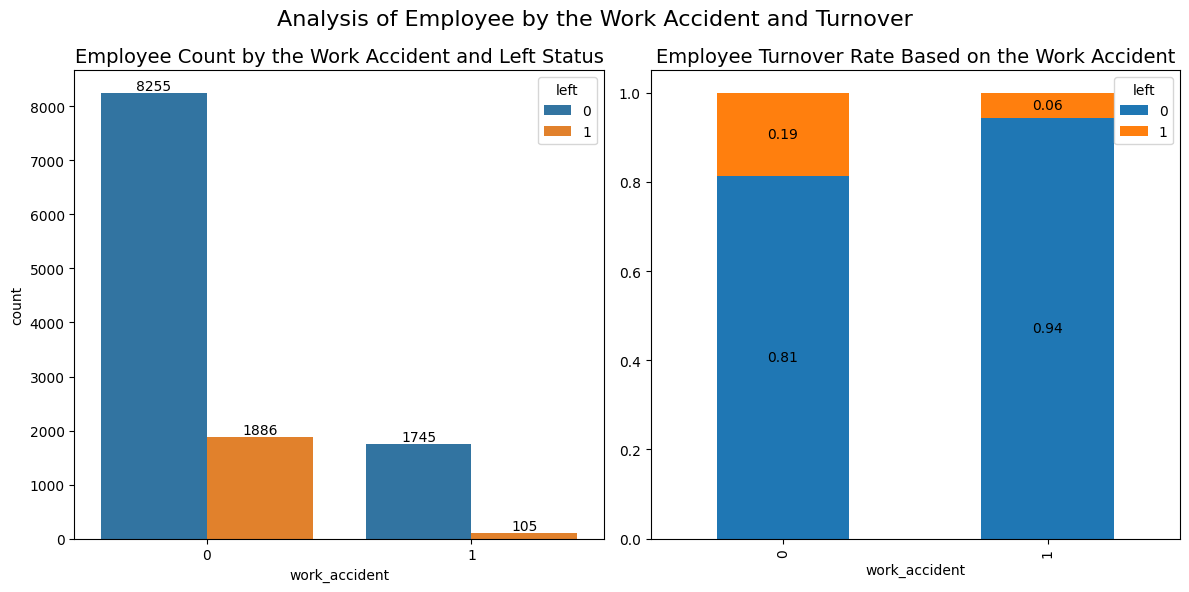

In [36]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Work Accident and Left Status', size=14)
ax1 = sns.countplot(x='work_accident', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('work_accident')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Work Accident', size=14)


# Overall Title
plt.suptitle('Analysis of Employee by the Work Accident and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 81% of employees who do **not** have work accident quit 
+ 94% of employees who have work accident quit 

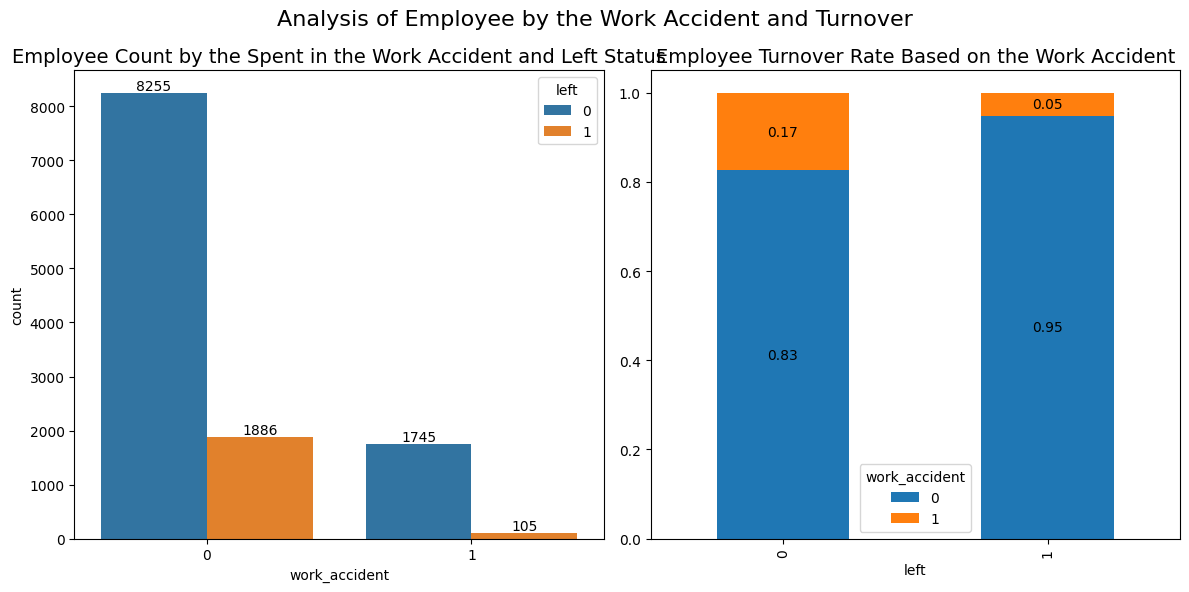

In [37]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Spent in the Work Accident and Left Status', size=14)
ax1 = sns.countplot(x='work_accident', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['work_accident'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Work Accident', size=14)


# Overall Title
plt.suptitle('Analysis of Employee by the Work Accident and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 17% of employees who quit have work accident
+ 5% of employees who do **not** quit have work accident
+ A work accident can be a reason to quit.

### promotion_last_5years

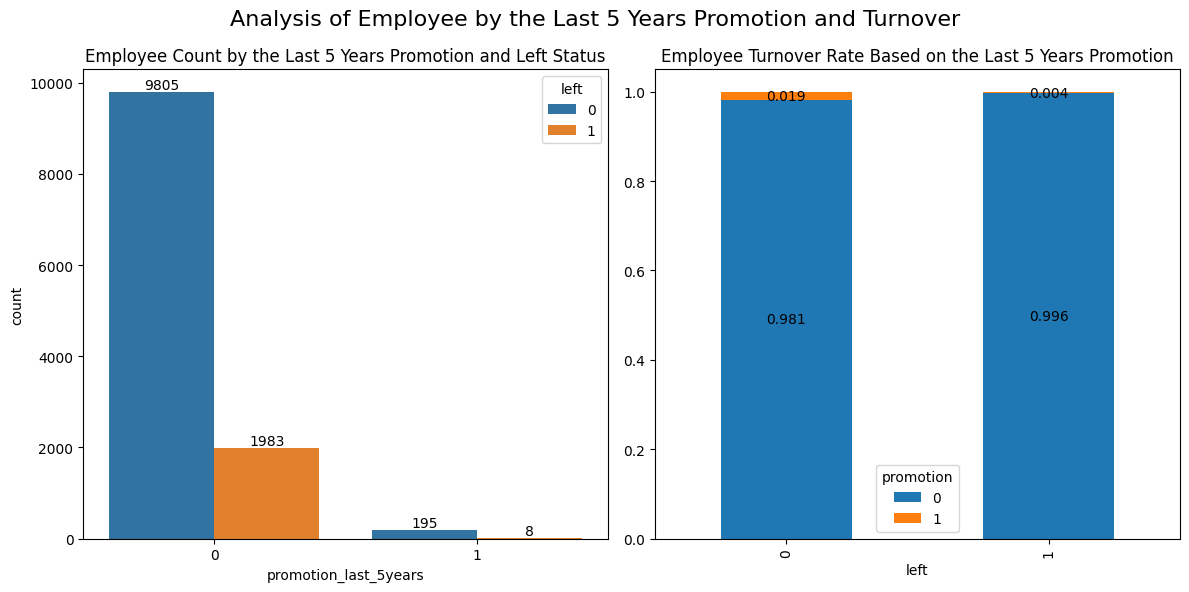

In [38]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Last 5 Years Promotion and Left Status', size=12)
ax1 = sns.countplot(x='promotion_last_5years', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['promotion_last_5years'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.3f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Last 5 Years Promotion', size=12)
ax2.legend(loc='lower center',title='promotion')

# Overall Title
plt.suptitle('Analysis of Employee by the Last 5 Years Promotion and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 98.1% of employees who quit do **not** have promotion last 5 years.
+ 99.6% of employees who do **not** quit  do **not** have promotion last 5 years.

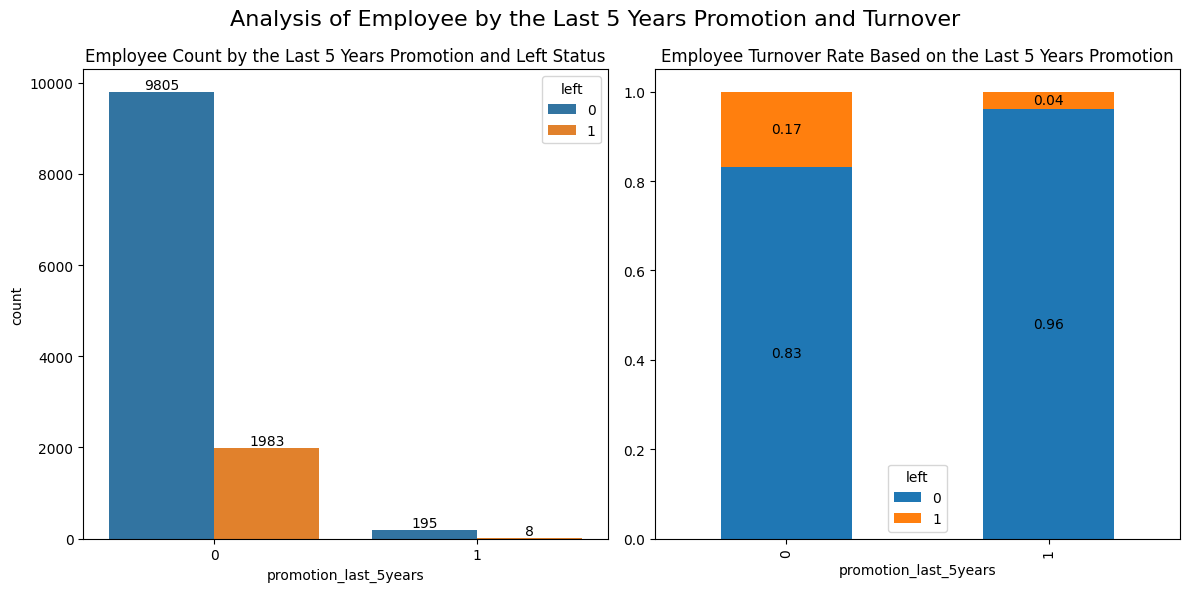

In [39]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Last 5 Years Promotion and Left Status', size=12)
ax1 = sns.countplot(x='promotion_last_5years', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('promotion_last_5years')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Last 5 Years Promotion', size=12)


# Overall Title
plt.suptitle('Analysis of Employee by the Last 5 Years Promotion and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 17% of employees who do **not** have promotion last 5 years do **not** quit .
+ 4% of employees who have promotion last 5 years do **not** quit.
+ This could imply that promotions might have a lesser impact on retention for employees, or it might indicate that those who receive promotions might be more inclined to seek opportunities elsewhere.

### Departments

In [40]:
pd.crosstab(df['left'],df['departments'])

departments   IT  RandD  accounting   hr  management  marketing  product_mng  \
left                                                                           
0            818    609         512  488         384        561          576   
1            158     85         109  113          52        112          110   

departments  sales  support  technical  
left                                    
0             2689     1509       1854  
1              550      312        390

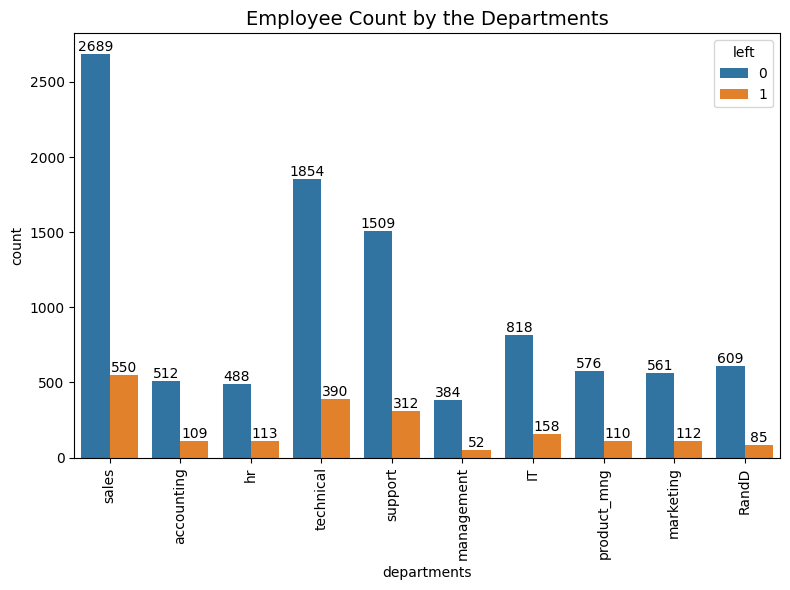

In [41]:
# Churn count department

ax = sns.countplot(x='departments',data=df,hue='left')
for i in ax.containers:
    ax.bar_label(i)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Employee Count by the Departments',fontsize=14)
plt.tight_layout();

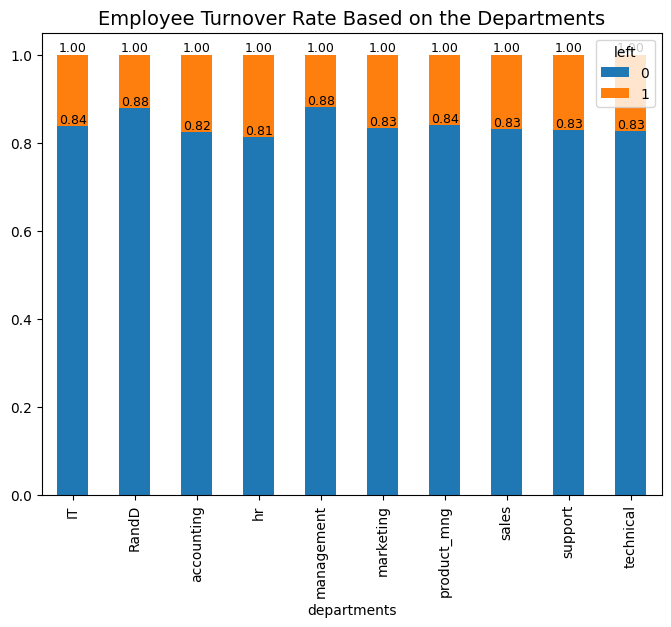

In [42]:
# Churn rate pro department

ax = df.groupby('departments')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f',fontsize=9)
plt.title('Employee Turnover Rate Based on the Departments',fontsize=14);

**COMMENT**

+ Although job resignations appear to be more prominent in the R&D and management departments, the overall turnover rates across all departments are relatively similar. 
+ Therefore, this feature may not be highly impactful in our analysis.

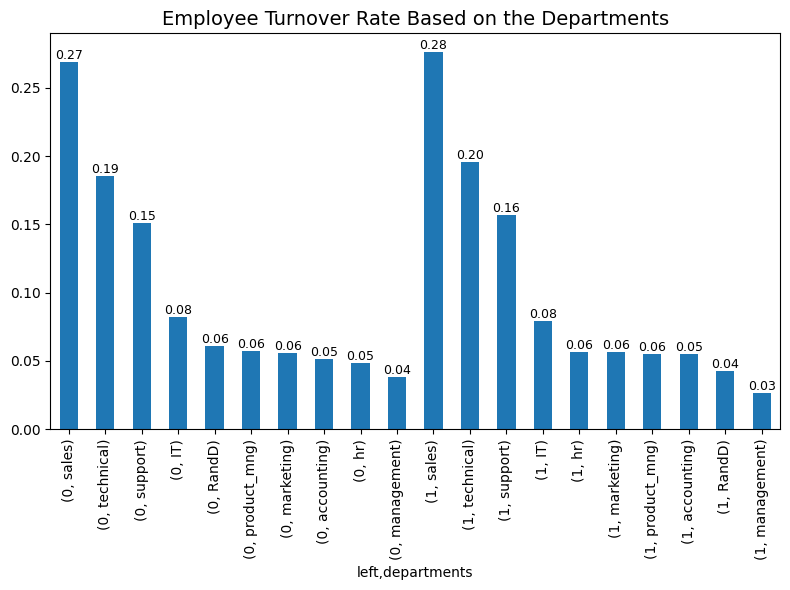

In [43]:
# department rate pro left

ax = df.groupby('left')['departments'].value_counts(normalize=True).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f',fontsize=9)
plt.title('Employee Turnover Rate Based on the Departments',fontsize=14);
plt.tight_layout();

### Salary

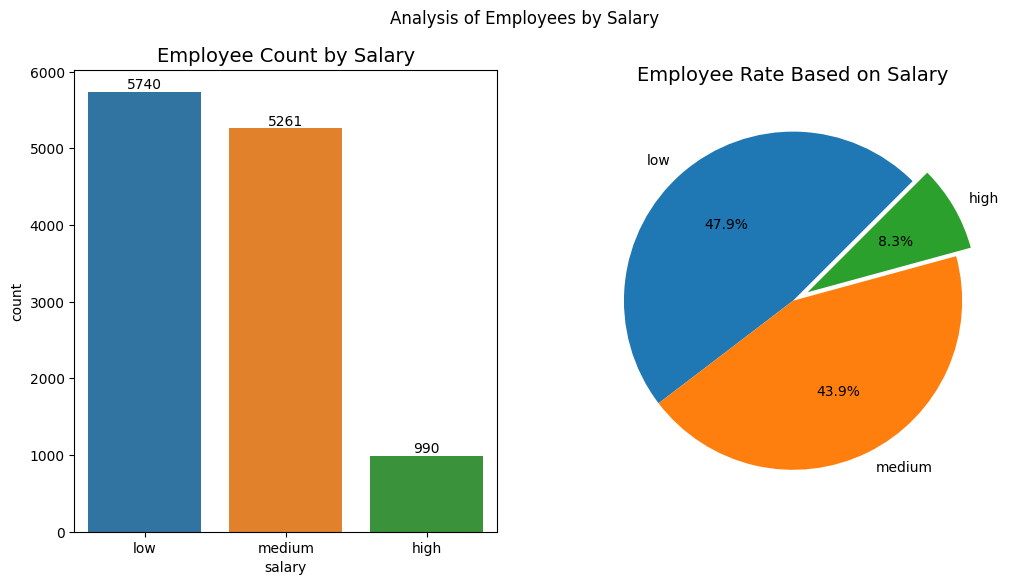

In [44]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by Salary', size=14)
ax1 = sns.countplot(x='salary', data=df)
ax1.bar_label(ax1.containers[0])

ax2 = plt.subplot(1, 2, 2)
plt.pie(df.salary.value_counts(), labels=df.salary.value_counts().index, autopct='%1.1f%%', startangle=45, explode=(0, 0, 0.1))
plt.title('Employee Rate Based on Salary', size=14)
plt.suptitle('Analysis of Employees by Salary')
plt.show()

**COMMENT**

+ 8.3% of employees receiving high salary
+ 43.9% of employees receiving medium salary
+ 47.9% of employees receiving low salary

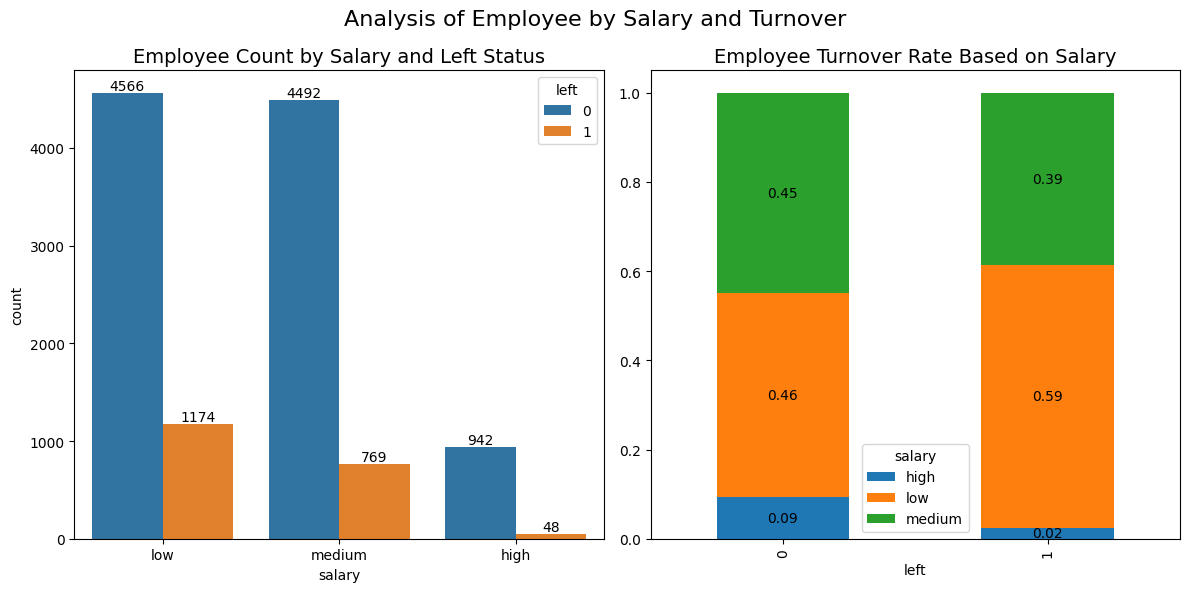

In [45]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by Salary and Left Status', size=14)
ax1 = sns.countplot(x='salary', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['salary'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on Salary', size=14)

# Overall Title
plt.suptitle('Analysis of Employee by Salary and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**

+ 46% of employees who quit have a low salary.
+ 45% of employees who quit have a medium salary.
+ 59% of employees who do **not** quit have a low salary.
+ 39% of employees who do **not** quit have a medium salary.
+ On the other hand, 9% of employees who quit have a high salary, while 2% of employees who do not quit have a high salary. Thus, those with high salaries tend to quit.

In [46]:
# # employee number pro salary
# ax = sns.countplot(x='salary',data=df,hue='left')
# for i in ax.containers:
#     ax.bar_label(i)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.tight_layout();

In [47]:
# ax = df.groupby('left')['salary'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
# for i in ax.containers:
#     ax.bar_label(i,fmt='%.2f')
# plt.title('Employee Turnover Rate Based on Salary', size=14);

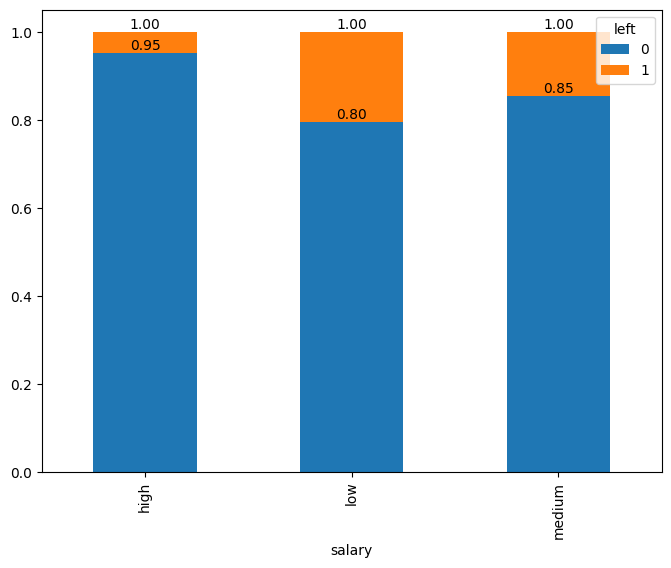

In [48]:
ax = df.groupby('salary')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

**COMMENT**

+ Employees with high salaries are more likely to quit, while employees with low salaries are less likely to quit.

In [49]:
### Departments vs Salary

In [50]:
# ax = sns.countplot(x='salary',hue='departments',data=df)
# for i in ax.containers:
#     ax.bar_label(i,fontsize=7.5)
# plt.tight_layout();

In [51]:
# df.groupby('salary')['departments'].value_counts().unstack().plot(kind='bar')

### Outliers

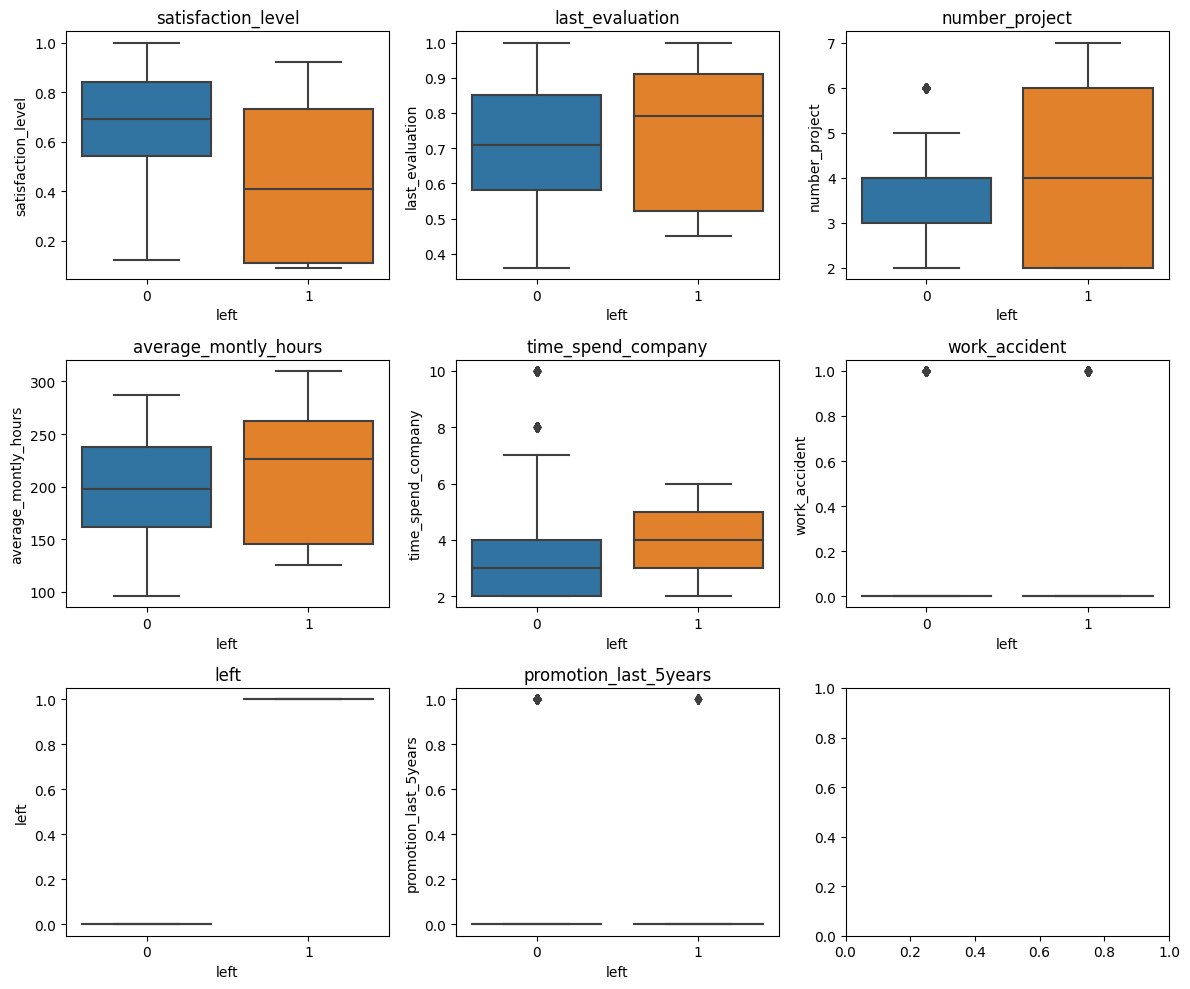

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

axes = axes.flatten()

# Iterate through each column and plot a histogram in the corresponding subplot
for i, column in enumerate(df.select_dtypes('number').columns):
    ax = axes[i]
    sns.boxplot(data=df, y=column,x='left', ax=ax) 
    ax.set_title(column)
    
plt.tight_layout()

**COMMENT**
+ Outliers appear in number_project and time_spend_company features.
+ Employees who quit have a higher average satisfaction_level.
+ Employees who quit have mostly less than 6 projects.
+ Employees who do **not** quit have have a higher average time_spend_company.

##### Examination of Outlier values
**Note**: I have created models both with and without dropping the outlier values. I will not drop the outliers in the following models since the result does not change much.

In [53]:
df[(df.left==0)&(df.number_project>5)].describe()

satisfaction_level  last_evaluation  number_project  \
count             455.000          455.000         455.000   
mean                0.463            0.687           6.000   
std                 0.273            0.182           0.000   
min                 0.120            0.360           6.000   
25%                 0.210            0.530           6.000   
50%                 0.410            0.690           6.000   
75%                 0.700            0.850           6.000   
max                 1.000            1.000           6.000   

       average_montly_hours  time_spend_company  work_accident    left  \
count               455.000             455.000        455.000 455.000   
mean                198.618               4.204          0.193   0.000   
std                  51.496               1.494          0.395   0.000   
min                  97.000               2.000          0.000   0.000   
25%                 159.500               3.000          0.000   0.000   
50%                 205.000               4.000          0.000   0.000   
75%                 240.000               5.000          0.000   0.000   
max                 287.000              10.000          1.000   0.000   

       promotion_last_5years  
count                455.000  
mean                   0.026  
std                    0.160  
min                    0.000  
25%                    0.000  
50%                    0.000  
75%                    0.000  
max                    1.000

In [54]:
df[(df.left==0)&(df.number_project>5)]

satisfaction_level  last_evaluation  number_project  \
1999                0.500            0.750               6   
2008                0.410            0.840               6   
2016                0.840            0.430               6   
2027                0.190            0.530               6   
2034                0.330            0.880               6   
...                   ...              ...             ...   
11881               0.390            0.750               6   
11896               0.210            0.850               6   
11917               0.780            0.530               6   
11921               0.970            0.920               6   
11929               0.150            0.740               6   

       average_montly_hours  time_spend_company  work_accident  left  \
1999                    127                   3              0     0   
2008                    191                   6              0     0   
2016                    246                   4              0     0   
2027                    191                   4              0     0   
2034                    260                   3              0     0   
...                     ...                 ...            ...   ...   
11881                   185                   3              0     0   
11896                   285                   7              0     0   
11917                   168                   3              0     0   
11921                   137                   8              1     0   
11929                   144                   7              0     0   

       promotion_last_5years  departments  salary  
1999                       0        sales     low  
2008                       0           hr  medium  
2016                       0    technical  medium  
2027                       0      support     low  
2034                       0    technical     low  
...                      ...          ...     ...  
11881                      1   management    high  
11896                      0        sales  medium  
11917                      0        sales     low  
11921                      0  product_mng     low  
11929                      1   management    high  

[455 rows x 10 columns]

In [55]:
df[(df.left==0)&(df.number_project>5)].salary.value_counts()

salary
low       207
medium    201
high       47
Name: count, dtype: int64

In [56]:
df[(df.left==0)&(df.number_project>5)].departments.value_counts()

departments
sales          133
technical       89
support         56
product_mng     37
RandD           35
IT              29
marketing       22
hr              19
accounting      19
management      16
Name: count, dtype: int64

In [57]:
#df = df[~((df.left==0)&(df.number_project>5))]

In [58]:
len(df[(df.left==0)&(df.time_spend_company>7)])

188

In [59]:
df[(df.left==0)&(df.time_spend_company>7)].describe()

satisfaction_level  last_evaluation  number_project  \
count             188.000          188.000         188.000   
mean                0.660            0.723           3.723   
std                 0.215            0.160           0.969   
min                 0.140            0.370           2.000   
25%                 0.530            0.607           3.000   
50%                 0.655            0.730           4.000   
75%                 0.833            0.860           4.000   
max                 0.990            1.000           6.000   

       average_montly_hours  time_spend_company  work_accident    left  \
count               188.000             188.000        188.000 188.000   
mean                196.888               9.138          0.250   0.000   
std                  48.261               0.993          0.434   0.000   
min                 100.000               8.000          0.000   0.000   
25%                 154.000               8.000          0.000   0.000   
50%                 199.500              10.000          0.000   0.000   
75%                 240.000              10.000          0.250   0.000   
max                 284.000              10.000          1.000   0.000   

       promotion_last_5years  
count                188.000  
mean                   0.069  
std                    0.254  
min                    0.000  
25%                    0.000  
50%                    0.000  
75%                    0.000  
max                    1.000

In [60]:
df[(df.left==0)&(df.time_spend_company>7)]

satisfaction_level  last_evaluation  number_project  \
10998               0.490            0.670               2   
10999               0.920            0.990               3   
11000               0.810            0.550               4   
11001               0.620            0.910               3   
11002               0.210            0.700               3   
...                   ...              ...             ...   
11985               0.220            0.940               3   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   

       average_montly_hours  time_spend_company  work_accident  left  \
10998                   190                   8              0     0   
10999                   176                   8              0     0   
11000                   217                   8              0     0   
11001                   269                   8              0     0   
11002                   238                   8              0     0   
...                     ...                 ...            ...   ...   
11985                   193                  10              0     0   
11986                   259                  10              1     0   
11987                   266                  10              0     0   
11988                   185                  10              0     0   
11989                   172                  10              0     0   

       promotion_last_5years departments  salary  
10998                      0   marketing  medium  
10999                      0       sales  medium  
11000                      0  accounting  medium  
11001                      0     support  medium  
11002                      0   technical  medium  
...                      ...         ...     ...  
11985                      1  management    high  
11986                      1  management    high  
11987                      1  management    high  
11988                      1  management    high  
11989                      1   marketing    high  

[188 rows x 10 columns]

In [61]:
df[(df.left==0)&(df.time_spend_company>7)].salary.value_counts()

salary
medium    89
low       58
high      41
Name: count, dtype: int64

In [62]:
df[(df.left==0)&(df.time_spend_company>7)].departments.value_counts()

departments
sales          53
management     43
support        19
marketing      16
technical      15
IT             13
accounting     12
product_mng     9
RandD           5
hr              3
Name: count, dtype: int64

In [63]:
df.departments.value_counts()

departments
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [64]:
#df = df[~((df.left==0)&(df.time_spend_company>7))]

In [65]:
#df.reset_index(drop=True,inplace=True)

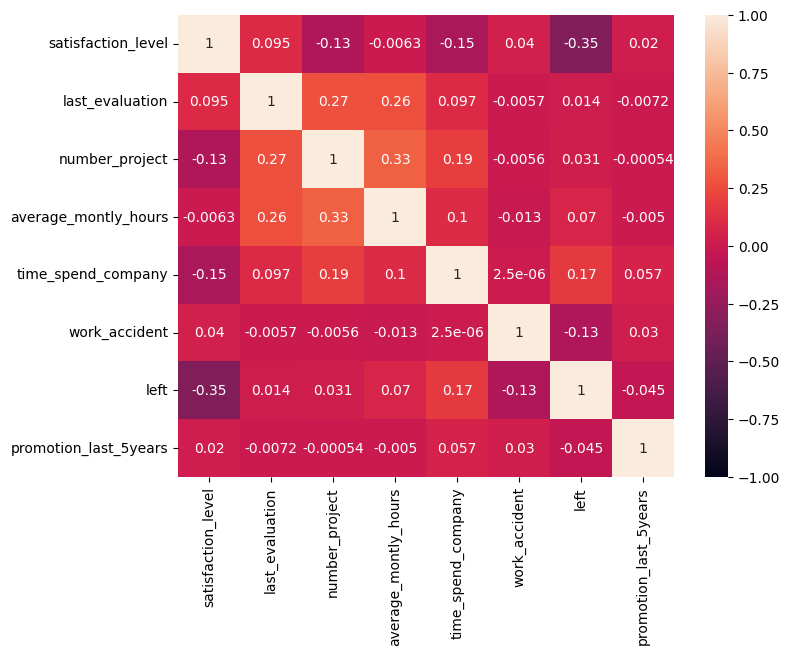

In [66]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1,vmax=1, annot=True);

## 3. Cluster Analysis

In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [68]:
df

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   
11990               0.500            0.730               4   

       average_montly_hours  time_spend_company  work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11986                   259                  10              1     0   
11987                   266                  10              0     0   
11988                   185                  10              0     0   
11989                   172                  10              0     0   
11990                   180                   3              0     0   

       promotion_last_5years departments  salary  
0                          0       sales     low  
1                          0       sales  medium  
2                          0       sales  medium  
3                          0       sales     low  
4                          0       sales     low  
...                      ...         ...     ...  
11986                      1  management    high  
11987                      1  management    high  
11988                      1  management    high  
11989                      1   marketing    high  
11990                      0          IT     low  

[11991 rows x 10 columns]

**The cardinality of the 'departments' feature is high and the overall quit rates in departments are close to each other, so I will not use it in the Clustering algorithm.**

In [69]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'salary']]
X

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   
11990               0.500            0.730               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  salary  
0                          0     low  
1                          0  medium  
2                          0  medium  
3                          0     low  
4                          0     low  
...                      ...     ...  
11986                      1    high  
11987                      1    high  
11988                      1    high  
11989                      1    high  
11990                      0     low  

[11991 rows x 8 columns]

In [70]:
# X = pd.concat([X,  pd.get_dummies(X, columns=['salary'], dtype=int,drop_first=True)], axis=1)
# X = X.drop(['salary'], axis=1)

In [71]:
# encoder = OrdinalEncoder()

# # Fit and transform the specified columns
# X['salary'] = encoder.fit_transform(X[['salary']])

In [72]:
ord_map = {'low':0,'medium':1, 'high':2}
X['salary'] = X['salary'].map(ord_map)

In [73]:
X

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   
11990               0.500            0.730               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  salary  
0                          0       0  
1                          0       1  
2                          0       1  
3                          0       0  
4                          0       0  
...                      ...     ...  
11986                      1       2  
11987                      1       2  
11988                      1       2  
11989                      1       2  
11990                      0       0  

[11991 rows x 8 columns]

<h3>ii. Determine optimal number of clusters</h3>

In [74]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   salary                 11991 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 749.6 KB


In [76]:
hopkins(X, 0.5)

0.7618745417635712

In [77]:
result=[]
for _ in range(10):
    result.append(hopkins(X, 1))
np.mean(result)

0.7619811222038193

In [78]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(X), 1))
np.mean(result)

0.8630550945285776

In [79]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(X), 1))
np.mean(result)

0.8832069619219054

In [80]:
X_scaled = StandardScaler().fit_transform(X)

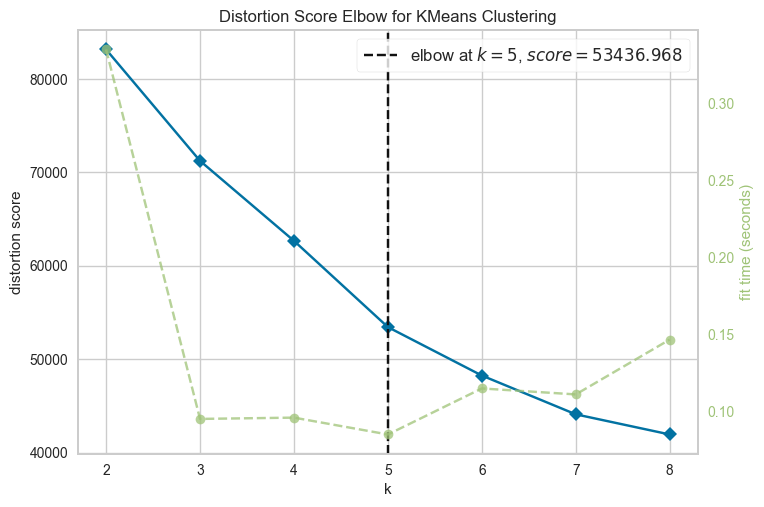

In [81]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

In [82]:
K=range(2,10)
distortion=[]
for k in K:
    kmeanModel = KMeans(n_clusters=k,
                        random_state=42)
    kmeanModel.fit(X_scaled)

    distances = kmeanModel.transform(X_scaled) 
    labels_ = kmeanModel.labels_ 

    result = []
    for i in range(k):
        cluster_distances = distances[labels_== i, i] 
        result.append(np.mean(cluster_distances**2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'Elbow Method')

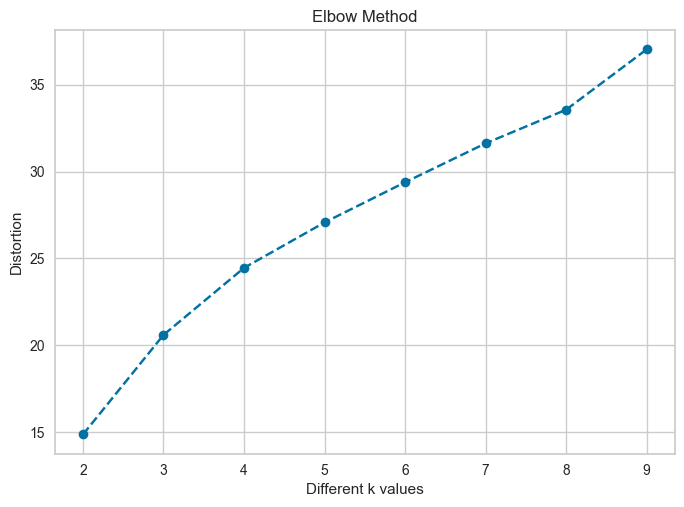

In [83]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("Distortion") 
plt.title("Elbow Method")

In [84]:
K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

In [85]:
K_means_model.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [86]:
silhouette_score(X_scaled, K_means_model.labels_)

0.19523053223962614

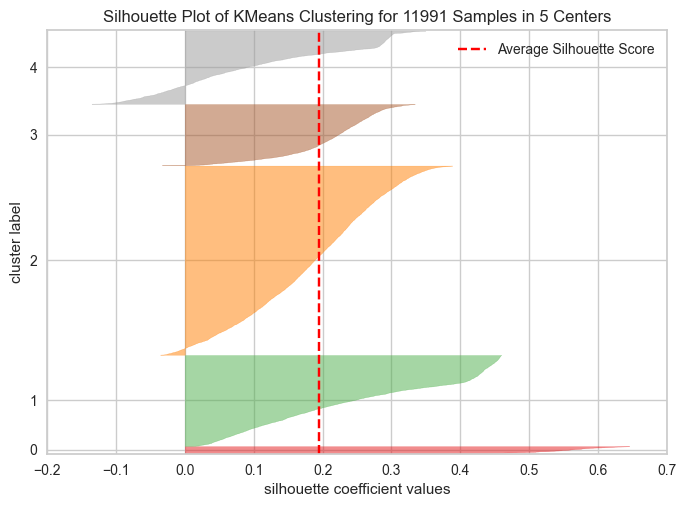

In [87]:
from yellowbrick.cluster import SilhouetteVisualizer         
visualizer = SilhouetteVisualizer(K_means_model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [88]:
pd.crosstab(K_means_model.labels_,df.left)

left      0    1
row_0           
0       195    8
1      1766  819
2      5273  108
3      1660   80
4      1106  976

In [89]:
pd.crosstab(K_means_model.labels_,[df.promotion_last_5years,df.left])

promotion_last_5years     0         1   
left                      0    1    0  1
row_0                                   
0                         0    0  195  8
1                      1766  819    0  0
2                      5273  108    0  0
3                      1660   80    0  0
4                      1106  976    0  0

In [90]:
pd.crosstab(K_means_model.labels_,[df.work_accident,df.left])

work_accident     0          1    
left              0    1     0   1
row_0                             
0               149    6    46   2
1              1764  819     2   0
2              5273  108     0   0
3                 0    0  1660  80
4              1069  953    37  23

In [91]:
pd.crosstab(K_means_model.labels_,[df.number_project,df.left])

number_project    2          3         4          5         6         7
left              0    1     0   1     0    1     0    1    0    1    1
row_0                                                                  
0                14    5    62   0    74    2    33    0   12    1    0
1               371  793   829  13   422   10   108    3   36    0    0
2               203   13  1832  19  2106   57  1061   13   71    5    1
3               123   44   602   1   550   17   320   16   65    2    0
4                14    2   157   5   296  151   368  311  271  363  144

In [92]:
pd.crosstab(K_means_model.labels_,[df.time_spend_company,df.left])

time_spend_company    2         3         4         5         6        7   8   \
left                   0   1     0    1    0    1    0    1    0    1   0   0   
row_0                                                                           
0                     39   0    83    6   21    1   10    1   11    0  18   5   
1                    480   8   793  790  284   14  116    7   72    0  15   6   
2                   1851  20  2602   18  715   15   76   55   28    0   1   0   
3                    492   1   709   45  243    7  116   23   63    4   9  18   
4                     17   2   129   15  247  458  262  396  259  105  51  52   

time_spend_company  10  
left                 0  
row_0                   
0                    8  
1                    0  
2                    0  
3                   10  
4                   89

In [93]:
pd.crosstab(K_means_model.labels_,[df.salary,df.left])

salary high       low      medium     
left      0   1     0    1      0    1
row_0                                 
0        44   0    33    5    118    3
1       134  23   904  490    728  306
2       504   4  2344   54   2425   50
3       140   0   808   39    712   41
4       120  21   477  586    509  369

In [94]:
pd.crosstab(K_means_model.labels_,[df.departments,df.salary]).T

row_0                0    1    2    3    4
departments salary                        
IT          high     0   12   44    4   11
            low      1  112  209   74   80
            medium   1   87  215   59   67
RandD       high     1    9   23    8    6
            low      3   76  126   57   60
            medium  17   47  158   44   59
accounting  high     5    6   33   13    6
            low      1   70  130   37   58
            medium   4   66  108   35   49
hr          high     2    3   26    3    4
            low      2   68  140   42   44
            medium   7   63  124   31   42
management  high    23    8   53   11   33
            low      3   27   64   20   25
            medium  10   22   77   25   35
marketing   high     3   13   31    7    8
            low      6   81  113   45   65
            medium  18   54  139   47   43
product_mng high     0   13   22   10    7
            low      0   78  143   55   67
            medium   0   76  128   42   45
sales       high     9   41  125   28   34
            low      9  402  636  220  286
            medium  40  285  655  216  253
support     high     0   19   60   30   17
            low      6  216  354  135  156
            medium  10  138  438  116  126
technical   high     1   33   91   26   15
            low      7  264  483  162  222
            medium  14  196  433  138  159

In [95]:
K_means_model = KMeans(n_clusters=4, 
                       random_state=42)

In [96]:
K_means_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

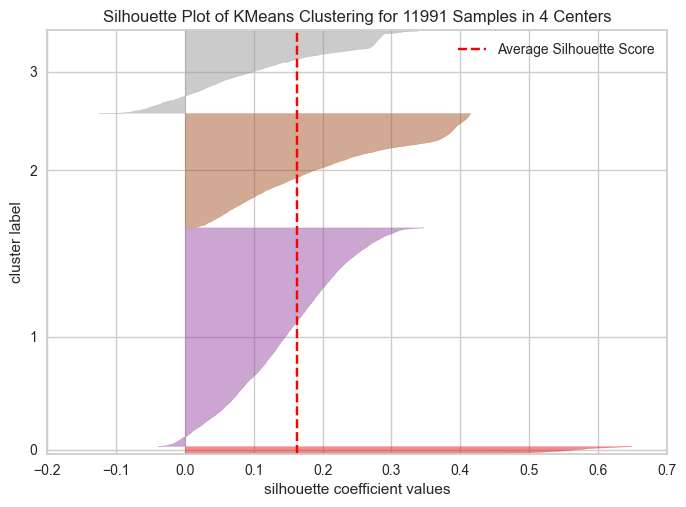

In [97]:
from yellowbrick.cluster import SilhouetteVisualizer         
visualizer = SilhouetteVisualizer(K_means_model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [98]:
pd.crosstab(K_means_model.labels_,df.left)

left      0     1
row_0            
0       195     8
1      6099   114
2      2374   865
3      1332  1004

In [99]:
pd.crosstab(K_means_model.labels_,[df.salary,df.left])

salary high       low      medium     
left      0   1     0    1      0    1
row_0                                 
0        44   0    33    5    118    3
1       587   3  2723   56   2789   55
2       167  23  1233  516    974  326
3       144  22   577  597    611  385

## 4. Predictive Model Building

### Preprocessing

In [100]:
X['departments'] = df.departments
X

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   
11990               0.500            0.730               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  salary departments  
0                          0       0       sales  
1                          0       1       sales  
2                          0       1       sales  
3                          0       0       sales  
4                          0       0       sales  
...                      ...     ...         ...  
11986                      1       2  management  
11987                      1       2  management  
11988                      1       2  management  
11989                      1       2   marketing  
11990                      0       0          IT  

[11991 rows x 9 columns]

In [101]:
y = df['left']
y.sample(3)

7911    0
8129    0
7356    0
Name: left, dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

In [103]:
X_train.shape,y_train.shape

((9592, 9), (9592,))

In [104]:
X_test.shape,y_test.shape

((2399, 9), (2399,))

In [105]:
onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
column_trans = make_column_transformer((onehot, ['departments']),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas") 

In [106]:
column_trans.fit_transform(X_train)

departments_IT  departments_RandD  departments_accounting  \
2032            0.000              0.000                   0.000   
10435           1.000              0.000                   0.000   
2021            0.000              0.000                   0.000   
11597           0.000              0.000                   0.000   
1999            0.000              0.000                   0.000   
...               ...                ...                     ...   
3933            0.000              0.000                   0.000   
7457            1.000              0.000                   0.000   
10327           0.000              0.000                   0.000   
9057            0.000              0.000                   0.000   
461             0.000              0.000                   0.000   

       departments_hr  departments_management  departments_marketing  \
2032            0.000                   0.000                  0.000   
10435           0.000                   0.000                  0.000   
2021            0.000                   0.000                  0.000   
11597           0.000                   1.000                  0.000   
1999            0.000                   0.000                  0.000   
...               ...                     ...                    ...   
3933            0.000                   0.000                  0.000   
7457            0.000                   0.000                  0.000   
10327           1.000                   0.000                  0.000   
9057            0.000                   1.000                  0.000   
461             0.000                   0.000                  0.000   

       departments_product_mng  departments_sales  departments_support  \
2032                     0.000              0.000                0.000   
10435                    0.000              0.000                0.000   
2021                     0.000              0.000                1.000   
11597                    0.000              0.000                0.000   
1999                     0.000              1.000                0.000   
...                        ...                ...                  ...   
3933                     0.000              0.000                1.000   
7457                     0.000              0.000                0.000   
10327                    0.000              0.000                0.000   
9057                     0.000              0.000                0.000   
461                      0.000              0.000                0.000   

       departments_technical  satisfaction_level  last_evaluation  \
2032                   1.000               0.980            0.910   
10435                  0.000               0.630            0.890   
2021                   0.000               0.850            0.590   
11597                  0.000               0.560            0.390   
1999                   0.000               0.500            0.750   
...                      ...                 ...              ...   
3933                   0.000               0.890            0.900   
7457                   0.000               0.570            0.420   
10327                  0.000               0.850            0.690   
9057                   0.000               0.660            0.620   
461                    1.000               0.800            0.530   

       number_project  average_montly_hours  time_spend_company  \
2032                4                   240                   3   
10435               3                   239                   3   
2021                3                   235                   3   
11597               3                   106                   8   
1999                6                   127                   3   
...               ...                   ...                 ...   
3933                4                   153                   3   
7457                2                   248                   4   
1032

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

In [107]:
#!pip install lightgbm

In [108]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting (XGBoost)
from xgboost import XGBClassifier

# Gradient Boosting (LightGBM)
from lightgbm import LGBMClassifier

# Support Vector Machines (SVM)
from sklearn.svm import SVC

# Neural Networks (using TensorFlow and Keras)
import tensorflow as tf
from tensorflow import keras
from sklearn.neural_network import MLPClassifier

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Decision Trees
from sklearn.tree import DecisionTreeClassifier

In [109]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

#### 1- Logistic Regression

In [110]:
# Model Building

In [111]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(class_weight="balanced",random_state=42))]

lg = Pipeline(steps=operations)
lg.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [112]:
# Evaluating Model Performance and Tuning
# Compare model performances according to metrics you choose for the problem.

In [113]:
eval_metric(lg, X_train, y_train, X_test, y_test)

Test_Set
[[1540  461]
 [  63  335]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2001
           1       0.42      0.84      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399


Train_Set
[[6079 1920]
 [ 279 1314]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.82      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.86      0.77      0.80      9592



In [114]:
#  Prediction

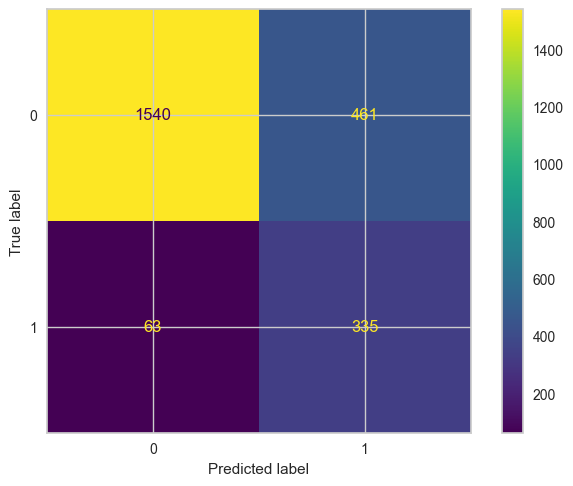

In [115]:
ConfusionMatrixDisplay.from_estimator(lg,X_test, y_test);

In [116]:
#grid search for Logistic Regression

In [117]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression())]

lg_model = Pipeline(steps=operations)

# Define parameter grid for grid search
param_grid = {
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__C': np.logspace(-3, 3, 7),
    'log_reg__class_weight': [None, 'balanced'],
    'log_reg__solver': ['liblinear', 'saga'],  # Additional solvers
    'log_reg__max_iter': [100, 200, 300]  # Maximum number of iterations
    #'log_reg__fit_intercept': [True, False],  # Whether to calculate the intercept
}

# Define scoring metrics for grid search
scoring_metrics = ['accuracy', 'precision','recall', 'f1', 'roc_auc']

# Create stratified k-fold cross-validator
#stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=lg_model,
    param_grid=param_grid,
    scoring=scoring_metrics,
    #cv=stratified_cv,
    #cv=5,
    refit='roc_auc',  # Refit based on ROC-AUC score
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best Parameters: {'log_reg__C': 0.1, 'log_reg__class_weight': 'balanced', 'log_reg__max_iter': 300, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}


In [118]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(class_weight="balanced",C=0.1,penalty='l1',solver='liblinear',max_iter=300,
                                             random_state=42))]

lg = Pipeline(steps=operations)
lg.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=300, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [119]:
eval_metric(lg, X_train, y_train, X_test, y_test)

Test_Set
[[1539  462]
 [  62  336]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2001
           1       0.42      0.84      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399


Train_Set
[[6070 1929]
 [ 279 1314]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.82      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.69      9592
weighted avg       0.86      0.77      0.80      9592



##### Cross Validation

In [120]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(class_weight="balanced",C=0.1,penalty='l1',solver='liblinear',max_iter=300,
                                             random_state=42))]

lg = Pipeline(steps=operations)

scores = cross_validate(lg,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.769
train_accuracy    0.769
test_precision    0.404
train_precision   0.405
test_recall       0.824
train_recall      0.825
test_f1           0.542
train_f1          0.543
test_roc_auc      0.834
train_roc_auc     0.836
dtype: float64

In [121]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(class_weight="balanced",C=0.1,penalty='l1',solver='liblinear',max_iter=300,
                                             random_state=42))]

lg = Pipeline(steps=operations)
lg.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=300, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [122]:
y_pred = lg.predict(X_test)
log_reg_f1 = f1_score(y_test, y_pred)
log_reg_acc = accuracy_score(y_test, y_pred)
log_reg_prec = precision_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_auc = roc_auc_score(y_test, y_pred)

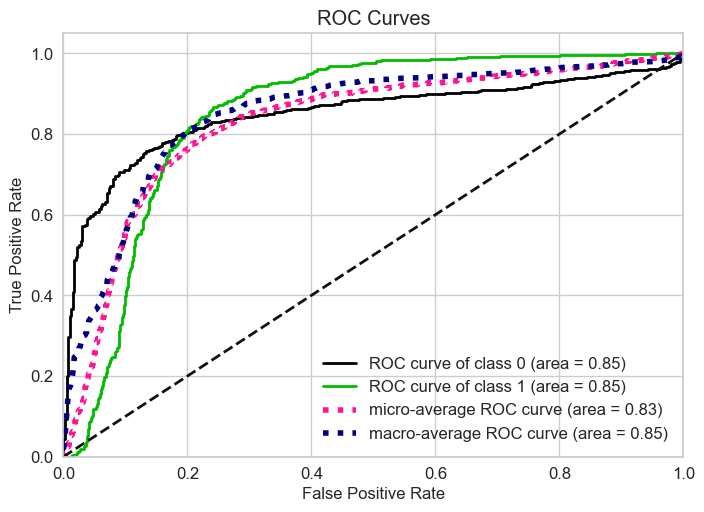

In [123]:
y_pred_proba = lg.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

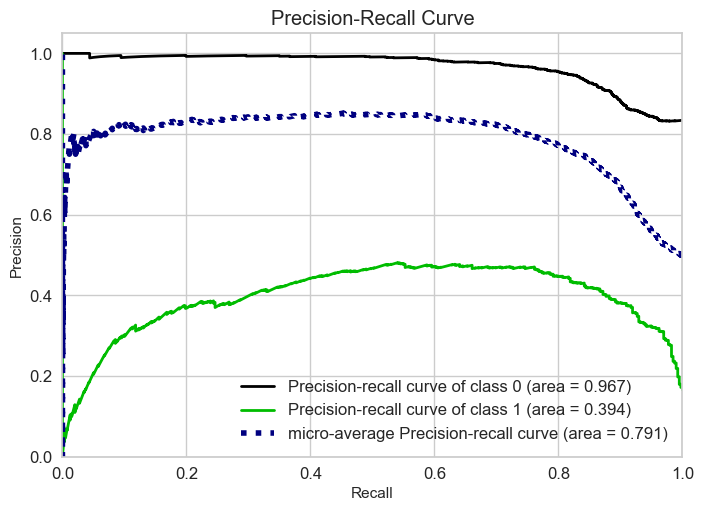

In [124]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

##### Feature Importance

In [125]:
lg_model = lg.named_steps['log_reg']

# Get feature importances (coefficients in this case)
feature_importances = np.ravel(lg_model.coef_)
one_hot_encoded_feature_names = lg.named_steps['OneHot_Ordinal_Encoder'].get_feature_names_out(X_train.columns)

# Create a DataFrame to store the feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': one_hot_encoded_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

Feature  Importance
14       time_spend_company       0.875
13     average_montly_hours       0.204
11          last_evaluation       0.194
7         departments_sales       0.017
8       departments_support       0.001
3            departments_hr       0.000
9     departments_technical       0.000
2    departments_accounting       0.000
0            departments_IT      -0.004
5     departments_marketing      -0.010
6   departments_product_mng      -0.027
4    departments_management      -0.086
1         departments_RandD      -0.101
16    promotion_last_5years      -0.159
17                   salary      -0.381
15            work_accident      -0.473
12           number_project      -0.499
10       satisfaction_level      -1.055

#### 2- Random Forest

In [126]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(random_state=42))]

rf = Pipeline(steps=operations)
rf.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('rand_forest', RandomForestClassifier(random_state=42))])

In [127]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[1997    4]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.95       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [128]:
# grid search for Random Forest

In [129]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(random_state=42))]

rf = Pipeline(steps=operations)


param_grid = {
    'rand_forest__n_estimators': [100, 200, 300],
    'rand_forest__max_depth': [None, 10, 20],
    'rand_forest__min_samples_split': [2, 5, 10],
    'rand_forest__min_samples_leaf': [1, 2, 4],
    #'rand_forest__bootstrap': [True, False]
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall', 
    cv=5,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'rand_forest__max_depth': None, 'rand_forest__min_samples_leaf': 1, 'rand_forest__min_samples_split': 10, 'rand_forest__n_estimators': 100}
Best Model: Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(min_samples_split=10,
                                        random_state=42))])


In [130]:
# Cross Validation

In [131]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(min_samples_split=10,random_state=42))]

rf = Pipeline(steps=operations)
scores = cross_validate(rf,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
rf_scores = pd.DataFrame(scores)
rf_scores.mean()[2:]

test_accuracy     0.983
train_accuracy    0.986
test_precision    0.986
train_precision   0.993
test_recall       0.910
train_recall      0.923
test_f1           0.947
train_f1          0.957
test_roc_auc      0.980
train_roc_auc     1.000
dtype: float64

In [132]:
# Final model

In [133]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(min_samples_split=10,random_state=42))]

rf = Pipeline(steps=operations)
rf.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(min_samples_split=10,
                                        random_state=42))])

In [134]:
y_pred = rf.predict(X_test)
random_forest_f1 = f1_score(y_test, y_pred)
random_forest_acc = accuracy_score(y_test, y_pred)
random_forest_prec = precision_score(y_test, y_pred)
random_forest_recall = recall_score(y_test, y_pred)
random_forest_auc = roc_auc_score(y_test, y_pred)

In [135]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[1997    4]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.95       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7988   11]
 [ 125 1468]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7999
           1       0.99      0.92      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.96      0.97      9592
weighted avg       0.99      0.99      0.99      9592



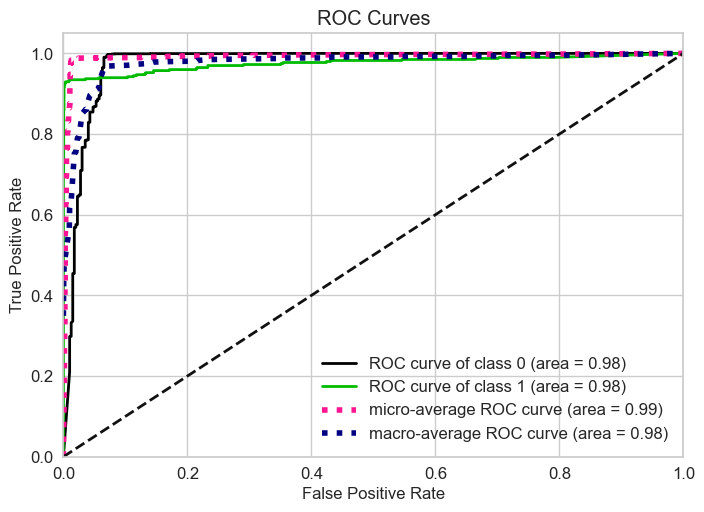

In [136]:
y_pred_proba = rf.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

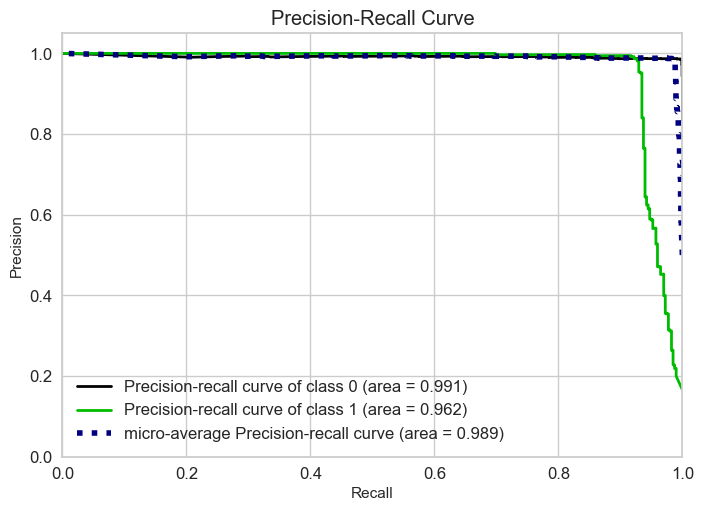

In [137]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

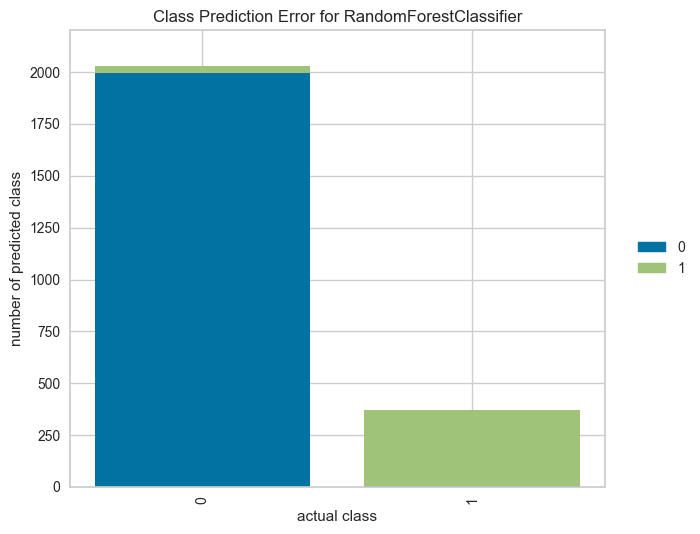

In [138]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

**Feature Importance**

In [139]:
rf_model = rf.named_steps["rand_forest"]

# Get feature importances
rf_features = rf_model.feature_importances_

# Print or use the feature importances
print(rf_features)

[0.00120479 0.00128423 0.00094217 0.0009698  0.00089247 0.00106829
 0.0007991  0.00151235 0.00130559 0.00135694 0.32756349 0.11583377
 0.18870389 0.15824934 0.18111024 0.0075093  0.0013568  0.00833744]


In [140]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['departments'])],
                  verbose_feature_names_out=False)

In [141]:
rf_model = rf.named_steps['rand_forest']

# Extracting the one-hot encoded feature names
one_hot_encoded_feature_names = rf.named_steps['OneHot_Ordinal_Encoder'].get_feature_names_out(X_train.columns)

# Get feature importances
rf_features = pd.DataFrame(index=one_hot_encoded_feature_names, data=rf_model.feature_importances_, columns=['Importance']).sort_values("Importance", ascending=False)

# Print or use the feature importances
print(rf_features)

                         Importance
satisfaction_level            0.328
number_project                0.189
time_spend_company            0.181
average_montly_hours          0.158
last_evaluation               0.116
salary                        0.008
work_accident                 0.008
departments_sales             0.002
departments_technical         0.001
promotion_last_5years         0.001
departments_support           0.001
departments_RandD             0.001
departments_IT                0.001
departments_marketing         0.001
departments_hr                0.001
departments_accounting        0.001
departments_management        0.001
departments_product_mng       0.001


##### Model with 5 Features:
+ satisfaction_level
+ number_project               
+ time_spend_company            
+ average_montly_hours          
+ last_evaluation             

In [142]:
X5 = X[['satisfaction_level','number_project','time_spend_company','average_montly_hours','last_evaluation']]

In [143]:
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, stratify = y, test_size = 0.20, random_state = 42)

In [144]:
operations = [("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(min_samples_split=10,random_state=42))]

rf = Pipeline(steps=operations)
rf.fit(X5_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(min_samples_split=10,
                                        random_state=42))])

In [145]:
y_pred5 = rf.predict(X5_test)
random_forest5_f1 = f1_score(y_test, y_pred5)
random_forest5_acc = accuracy_score(y_test, y_pred5)
random_forest5_prec = precision_score(y_test, y_pred5)
random_forest5_recall = recall_score(y_test, y_pred5)
random_forest5_auc = roc_auc_score(y_test, y_pred5)

In [146]:
eval_metric(rf, X5_train, y_train, X5_test, y_test)

Test_Set
[[1998    3]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7987   12]
 [ 121 1472]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.92      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.96      0.97      9592
weighted avg       0.99      0.99      0.99      9592



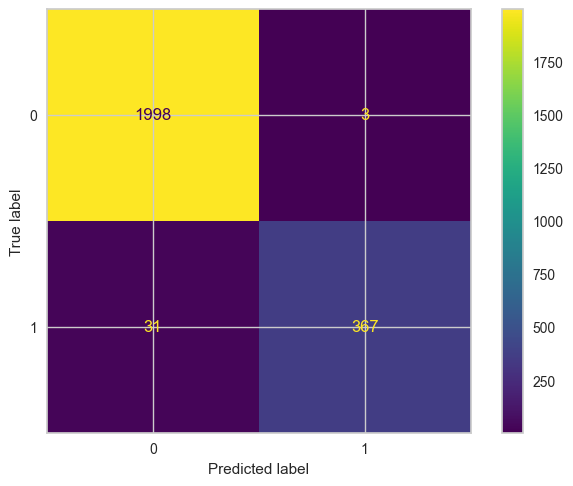

In [147]:
ConfusionMatrixDisplay.from_estimator(rf,X5_test, y_test);

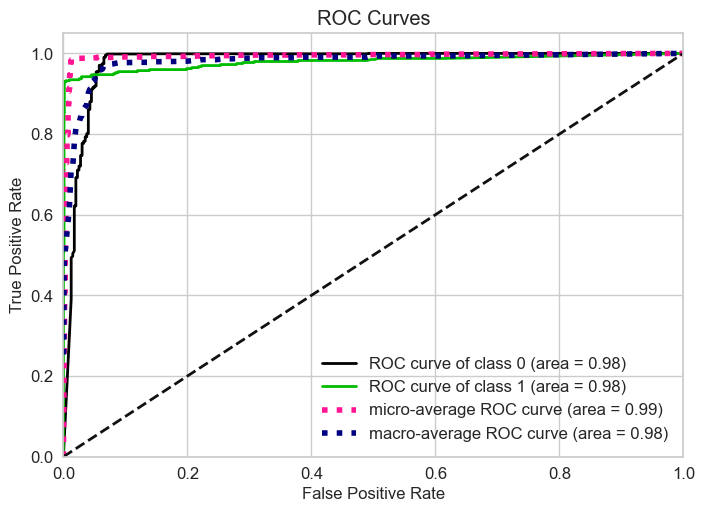

In [148]:
y_pred_proba = rf.predict_proba(X5_test)
plot_roc(y_test, y_pred_proba)
plt.show();

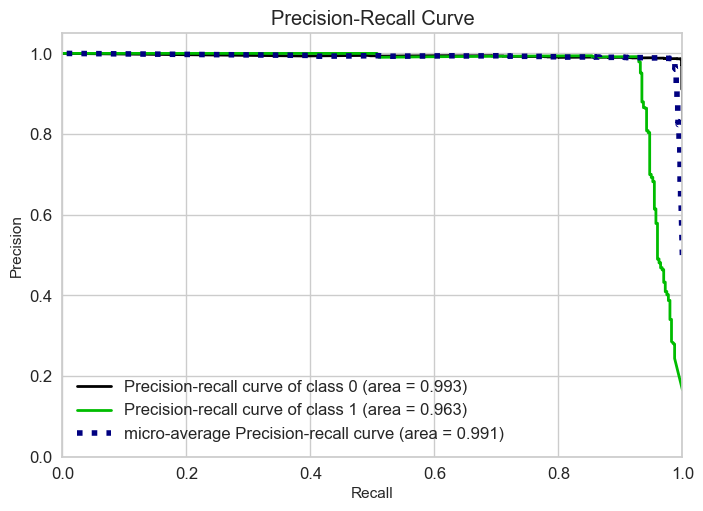

In [149]:
y_pred_proba = rf.predict_proba(X5_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [150]:
operations = [
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(min_samples_split=10,random_state=42))]

rf = Pipeline(steps=operations)
scores = cross_validate(rf,
                        X5_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.984
train_accuracy    0.986
test_precision    0.987
train_precision   0.992
test_recall       0.915
train_recall      0.923
test_f1           0.949
train_f1          0.956
test_roc_auc      0.981
train_roc_auc     1.000
dtype: float64

#### 3- Gradient Boosting ( XGBoost, LightGBM)

##### XGBOOST

In [151]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gradient_Boosting", XGBClassifier(random_state=42))]

gb = Pipeline(steps=operations)
gb.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Gradient_Boosting',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, c...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [152]:
eval_metric(gb, X_train, y_train, X_test, y_test)

Test_Set
[[1987   14]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7993    6]
 [  33 1560]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592



In [153]:
# grid search for XGboost

In [154]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gradient_Boosting", XGBClassifier(random_state=42))]

gb = Pipeline(steps=operations)

# Define the hyperparameters to search
param_grid = {
    #'OneHot_Encoder__onehot__drop': [None, 'first'],
    'Gradient_Boosting__n_estimators': [50, 100, 200],
    'Gradient_Boosting__learning_rate': [0.01, 0.1, 0.2],
    'Gradient_Boosting__max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'Gradient_Boosting__learning_rate': 0.1, 'Gradient_Boosting__max_depth': 7, 'Gradient_Boosting__n_estimators': 100}
Best Model: Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Gradient_Boosting',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                     

In [155]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gradient_Boosting", XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=100, random_state=42))]

gb = Pipeline(steps=operations)
scores = cross_validate(gb,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.984
train_accuracy    0.989
test_precision    0.984
train_precision   0.991
test_recall       0.918
train_recall      0.944
test_f1           0.950
train_f1          0.967
test_roc_auc      0.986
train_roc_auc     0.998
dtype: float64

In [156]:
#final model

In [157]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gradient_Boosting", XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=100, random_state=42))]

gb = Pipeline(steps=operations)
gb.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Gradient_Boosting',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, c...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=7, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [158]:
y_pred = gb.predict(X_test)
XGB_f1 = f1_score(y_test, y_pred)
XGB_acc = accuracy_score(y_test, y_pred)
XGB_prec = precision_score(y_test, y_pred)
XGB_recall = recall_score(y_test, y_pred)
XGB_auc = roc_auc_score(y_test, y_pred)

In [159]:
eval_metric(gb, X_train, y_train, X_test, y_test)

Test_Set
[[1992    9]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7985   14]
 [  89 1504]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.97      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



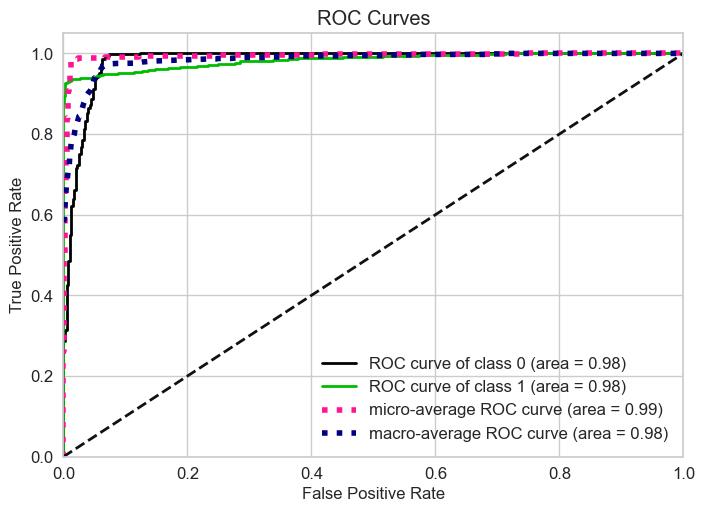

In [160]:
y_pred_proba = gb.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

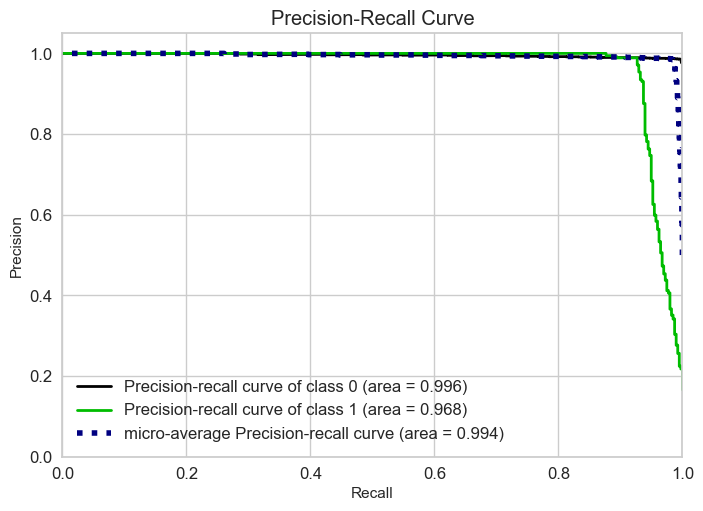

In [161]:
y_pred_proba = gb.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

**Feature Importance**

In [162]:
gb_model = gb.named_steps['Gradient_Boosting']

# Extracting the one-hot encoded feature names
one_hot_encoded_feature_names = gb.named_steps['OneHot_Ordinal_Encoder'].get_feature_names_out(X_train.columns)

# Get feature importances
gb_features = pd.DataFrame(index=one_hot_encoded_feature_names, data=gb_model.feature_importances_, columns=['Importance']).sort_values("Importance", ascending=False)

# Print or use the feature importances
print(gb_features)


                         Importance
satisfaction_level            0.314
time_spend_company            0.262
number_project                0.122
last_evaluation               0.099
average_montly_hours          0.044
work_accident                 0.026
departments_product_mng       0.025
salary                        0.017
departments_management        0.017
departments_sales             0.017
departments_RandD             0.011
departments_IT                0.010
departments_hr                0.010
departments_support           0.009
departments_technical         0.009
promotion_last_5years         0.007
departments_accounting        0.001
departments_marketing         0.000


##### LGB

In [163]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("LGB", LGBMClassifier())]

lgb = Pipeline(steps=operations)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1593, number of negative: 7999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 9592, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166076 -> initscore=-1.613698
[LightGBM] [Info] Start training from score -1.613698


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('LGB', LGBMClassifier())])

In [164]:
eval_metric(lgb, X_train, y_train, X_test, y_test)

Test_Set
[[1992    9]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7991    8]
 [  46 1547]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7999
           1       0.99      0.97      0.98      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.99      0.99      9592
weighted avg       0.99      0.99      0.99      9592



In [165]:
#grid search

In [166]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("LGB", LGBMClassifier())]

lgb = Pipeline(steps=operations)

# Define the hyperparameters to search
param_grid = {
    'LGB__n_estimators': [50, 100, 200],
    'LGB__learning_rate': [0.01, 0.1, 0.2],
    'LGB__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(lgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166015 -> initscore=-1.614136
[LightGBM] [Info] Start training from score -1.614136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn'

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166015 -> initscore=-1.614136
[LightGBM] [Info] Start training from score -1.614136
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_le

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166015 -> initscore=-1.614136
[LightGBM] [Info] Start training from score -1.614136
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training fr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 428
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training fr

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 429
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gai

In [167]:
# cross validation

In [168]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("LGB", LGBMClassifier(learning_rate=0.1,max_depth=7,n_estimators=100))]

lgb = Pipeline(steps=operations)
scores = cross_validate(lgb,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166015 -> initscore=-1.614136
[LightGBM] [Info] Start training from score -1.614136
[LightGBM] [Warning] No further splits with positive gai

test_accuracy     0.984
train_accuracy    0.991
test_precision    0.979
train_precision   0.993
test_recall       0.922
train_recall      0.952
test_f1           0.950
train_f1          0.972
test_roc_auc      0.986
train_roc_auc     0.999
dtype: float64

In [169]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("LGB", LGBMClassifier(learning_rate=0.1,max_depth=7,n_estimators=100,num_leaves=64))]

lgb = Pipeline(steps=operations)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1593, number of negative: 7999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 431
[LightGBM] [Info] Number of data points in the train set: 9592, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166076 -> initscore=-1.613698
[LightGBM] [Info] Start training from score -1.613698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('LGB', LGBMClassifier(max_depth=7, num_leaves=64))])

In [170]:
y_pred = lgb.predict(X_test)
LGB_f1 = f1_score(y_test, y_pred)
LGB_acc = accuracy_score(y_test, y_pred)
LGB_prec = precision_score(y_test, y_pred)
LGB_recall = recall_score(y_test, y_pred)
LGB_auc = roc_auc_score(y_test, y_pred)

In [171]:
eval_metric(lgb, X_train, y_train, X_test, y_test)

Test_Set
[[1990   11]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.97      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7989   10]
 [  77 1516]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.95      0.97      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.98      0.98      9592
weighted avg       0.99      0.99      0.99      9592



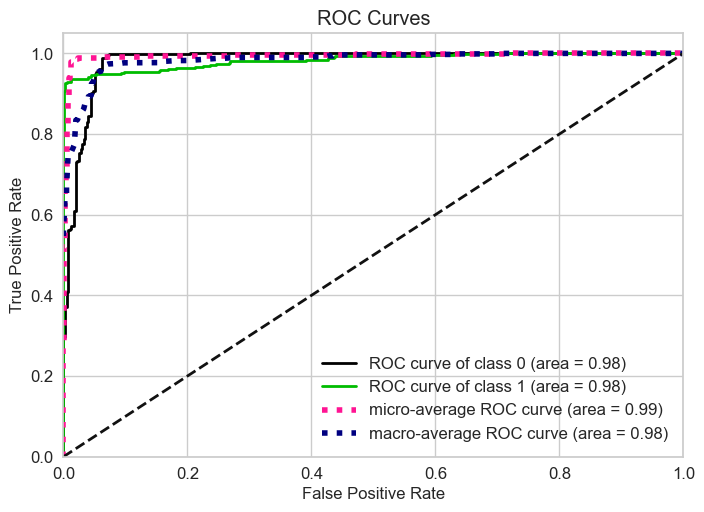

In [172]:
y_pred_proba = lgb.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

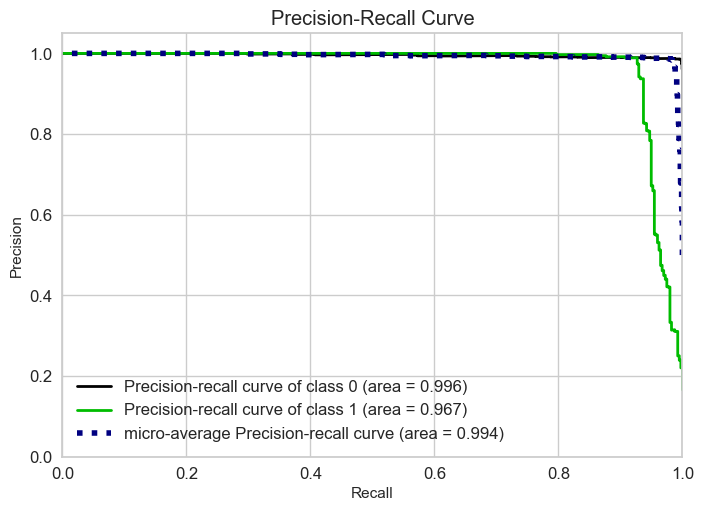

In [173]:
y_pred_proba = lgb.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

**Feature Importance**

In [174]:
lgb_model = lgb.named_steps["LGB"]

# Extracting the one-hot encoded feature names
one_hot_encoded_feature_names = lgb.named_steps['OneHot_Ordinal_Encoder'].get_feature_names_out(X_train.columns)

# Get feature importances
lgb_features = pd.DataFrame(index=one_hot_encoded_feature_names, data=lgb_model.feature_importances_, columns=['Importance']).sort_values("Importance", ascending=False)

# Print or use the feature importances
print(lgb_features)


                         Importance
average_montly_hours           1102
last_evaluation                 970
satisfaction_level              946
number_project                  579
time_spend_company              441
salary                          168
departments_support              58
departments_sales                52
work_accident                    40
departments_IT                   38
departments_technical            24
departments_management           22
departments_hr                   22
departments_RandD                15
departments_accounting            9
promotion_last_5years             5
departments_product_mng           2
departments_marketing             2


#### 4- Support Vector Machines (SVM)

In [175]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("sup_vec", SVC(probability=True,random_state=42))]

svc = Pipeline(steps=operations)
svc.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('sup_vec', SVC(probability=True, random_state=42))])

In [176]:
eval_metric(svc, X_train, y_train, X_test, y_test)

Test_Set
[[1949   52]
 [  46  352]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.87      0.88      0.88       398

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7814  185]
 [ 180 1413]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.89      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



In [177]:
#grid search for svm

In [178]:
operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("sup_vec", SVC(probability=True, random_state=42))
]

svc = Pipeline(steps=operations)

# Define the hyperparameters to search for SVC
param_grid = {
    'sup_vec__C': [0.1, 1, 10],
    'sup_vec__kernel': ['linear', 'rbf'],
    'sup_vec__gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'sup_vec__C': 10, 'sup_vec__gamma': 'scale', 'sup_vec__kernel': 'rbf'}
Best Model: Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('sup_vec', SVC(C=10, probability=True, random_state=42))])


In [179]:
#cross validation

In [180]:
operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("sup_vec", SVC(C=10,probability=True, random_state=42))
]

svc = Pipeline(steps=operations)
scores = cross_validate(svc,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.963
train_accuracy    0.974
test_precision    0.888
train_precision   0.927
test_recall       0.889
train_recall      0.914
test_f1           0.888
train_f1          0.920
test_roc_auc      0.967
train_roc_auc     0.983
dtype: float64

In [181]:
operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("sup_vec", SVC(C=10,probability=True, random_state=42))
]

svc = Pipeline(steps=operations)
svc.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('sup_vec', SVC(C=10, probability=True, random_state=42))])

In [182]:
y_pred = svc.predict(X_test)
SVM_f1 = f1_score(y_test, y_pred)
SVM_acc = accuracy_score(y_test, y_pred)
SVM_prec = precision_score(y_test, y_pred)
SVM_recall = recall_score(y_test, y_pred)
SVM_auc = roc_auc_score(y_test, y_pred)

In [183]:
eval_metric(svc, X_train, y_train, X_test, y_test)

Test_Set
[[1960   41]
 [  37  361]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.90      0.91      0.90       398

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7887  112]
 [ 143 1450]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7999
           1       0.93      0.91      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.96      0.95      0.95      9592
weighted avg       0.97      0.97      0.97      9592



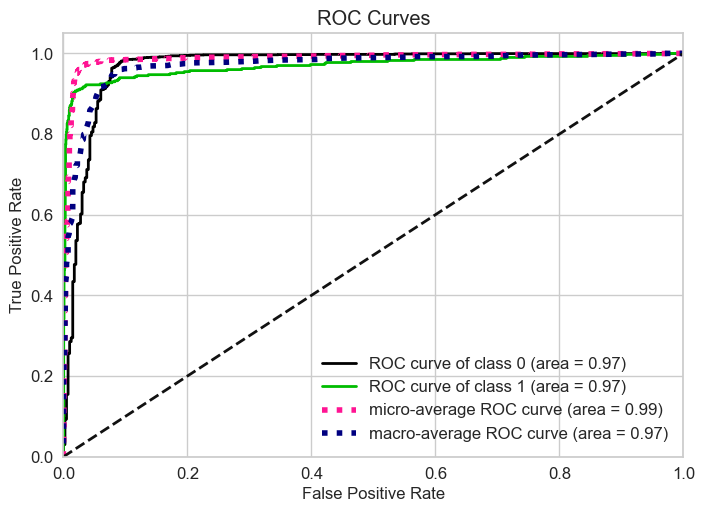

In [184]:
y_pred_proba = svc.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

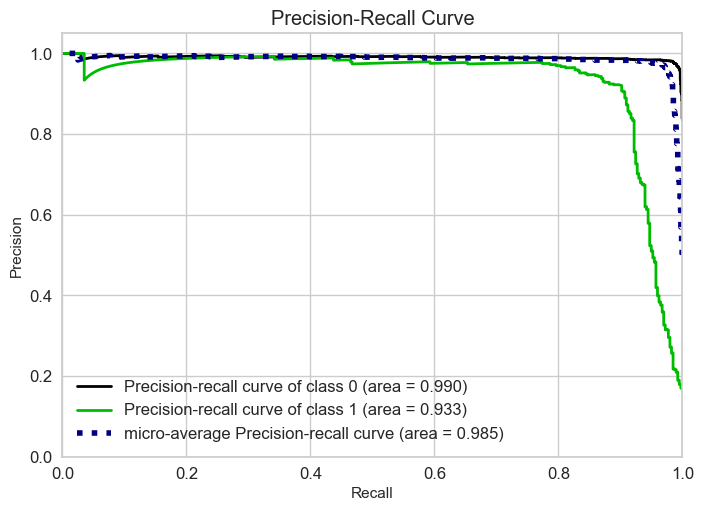

In [185]:
y_pred_proba = svc.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

#### 5- K-Nearest Neighbors (KNN)

In [186]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("k_nearest", KNeighborsClassifier())]

knn = Pipeline(steps=operations)
knn.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('k_nearest', KNeighborsClassifier())])

In [187]:
eval_metric(knn, X_train, y_train, X_test, y_test)

Test_Set
[[1926   75]
 [  41  357]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.83      0.90      0.86       398

    accuracy                           0.95      2399
   macro avg       0.90      0.93      0.92      2399
weighted avg       0.95      0.95      0.95      2399


Train_Set
[[7809  190]
 [ 176 1417]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.89      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



In [188]:
#grid search for k-nearest

In [189]:
operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("k_nearest", KNeighborsClassifier())
]

knn = Pipeline(steps=operations)

param_grid = {
    'k_nearest__n_neighbors': [3, 5, 7],
    'k_nearest__weights': ['uniform', 'distance'],
    'k_nearest__p': [1, 2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'k_nearest__n_neighbors': 3, 'k_nearest__p': 2, 'k_nearest__weights': 'distance'}
Best Model: Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('k_nearest',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])


In [190]:
#cross validation

In [191]:
operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("k_nearest", KNeighborsClassifier(n_neighbors=3,weights='distance'))
]

knn = Pipeline(steps=operations)
scores = cross_validate(knn,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.953
train_accuracy    1.000
test_precision    0.839
train_precision   1.000
test_recall       0.886
train_recall      1.000
test_f1           0.862
train_f1          1.000
test_roc_auc      0.943
train_roc_auc     1.000
dtype: float64

**There is overfitting, we need to tune!**

In [192]:
operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("k_nearest", KNeighborsClassifier(n_neighbors=3,weights='uniform'))
]

knn = Pipeline(steps=operations)
scores = cross_validate(knn,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.951
train_accuracy    0.968
test_precision    0.837
train_precision   0.903
test_recall       0.879
train_recall      0.905
test_f1           0.857
train_f1          0.904
test_roc_auc      0.943
train_roc_auc     0.995
dtype: float64

In [193]:
# Now, there is no overfitting!

In [194]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("k_nearest", KNeighborsClassifier(n_neighbors=3,weights='uniform'))]

knn = Pipeline(steps=operations)
knn.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('k_nearest', KNeighborsClassifier(n_neighbors=3))])

In [195]:
y_pred = knn.predict(X_test)
KNN_f1 = f1_score(y_test, y_pred)
KNN_acc = accuracy_score(y_test, y_pred)
KNN_prec = precision_score(y_test, y_pred)
KNN_recall = recall_score(y_test, y_pred)
KNN_auc = roc_auc_score(y_test, y_pred)

In [196]:
eval_metric(knn, X_train, y_train, X_test, y_test)

Test_Set
[[1933   68]
 [  39  359]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.90      0.87       398

    accuracy                           0.96      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7857  142]
 [ 150 1443]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.91      0.91      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.95      0.94      0.94      9592
weighted avg       0.97      0.97      0.97      9592



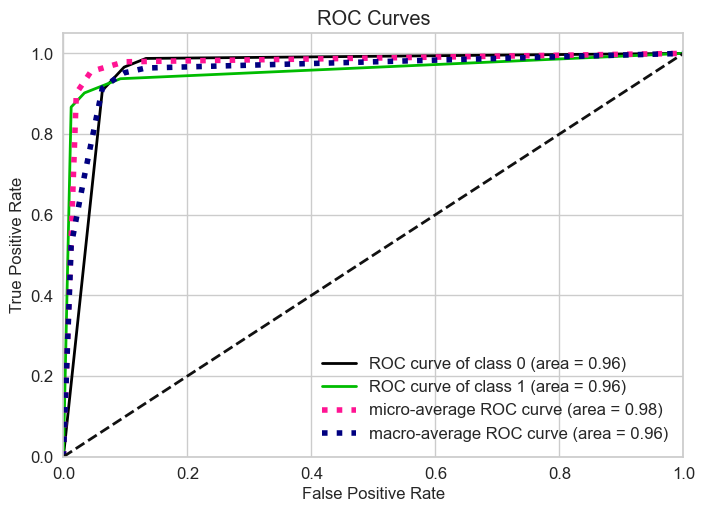

In [197]:
y_pred_proba = knn.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

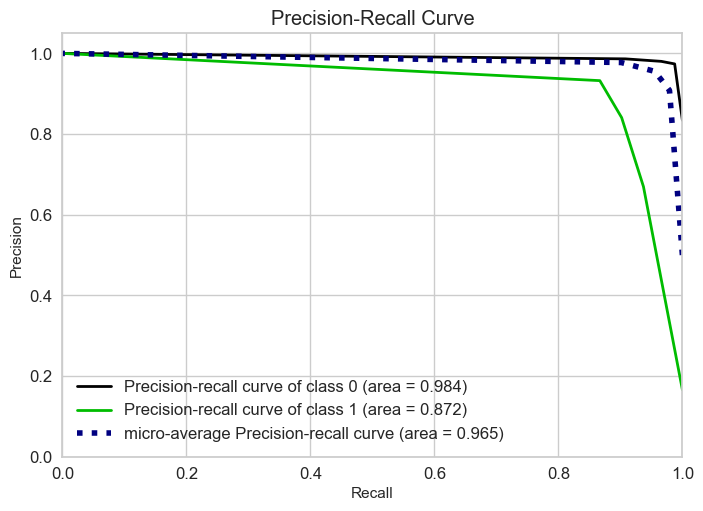

In [198]:
y_pred_proba = knn.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

#### 6- Naive Bayes

In [199]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gaussian", GaussianNB())]

nb = Pipeline(steps=operations)
nb.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('Gaussian', GaussianNB())])

In [200]:
eval_metric(nb, X_train, y_train, X_test, y_test)

Test_Set
[[1740  261]
 [ 113  285]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2001
           1       0.52      0.72      0.60       398

    accuracy                           0.84      2399
   macro avg       0.73      0.79      0.75      2399
weighted avg       0.87      0.84      0.85      2399


Train_Set
[[6783 1216]
 [ 493 1100]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7999
           1       0.47      0.69      0.56      1593

    accuracy                           0.82      9592
   macro avg       0.70      0.77      0.73      9592
weighted avg       0.86      0.82      0.83      9592



In [201]:
#grid search for Naive Bayes

**Since Gaussian Naive Bayes doesn't have many hyperparameters to tune, we don't need an extensive grid search.**

In [202]:
operations = [
    ("OneHot_Ordinal_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("Gaussian", GaussianNB())
]

nb = Pipeline(steps=operations)

param_grid = {
    'Gaussian__var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform GridSearchCV
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'Gaussian__var_smoothing': 1e-09}
Best Model: Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('Gaussian', GaussianNB())])


In [203]:
#cross validation

In [204]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gaussian", GaussianNB())]

nb = Pipeline(steps=operations)
scores = cross_validate(nb,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.817
train_accuracy    0.817
test_precision    0.466
train_precision   0.465
test_recall       0.688
train_recall      0.689
test_f1           0.555
train_f1          0.555
test_roc_auc      0.822
train_roc_auc     0.828
dtype: float64

In [205]:
#final model

In [206]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gaussian", GaussianNB())]

nb = Pipeline(steps=operations)
nb.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('Gaussian', GaussianNB())])

In [207]:
y_pred = nb.predict(X_test)
Naive_Bayes_f1 = f1_score(y_test, y_pred)
Naive_Bayes_acc = accuracy_score(y_test, y_pred)
Naive_Bayes_prec = precision_score(y_test, y_pred)
Naive_Bayes_recall = recall_score(y_test, y_pred)
Naive_Bayes_auc = roc_auc_score(y_test, y_pred)

In [208]:
eval_metric(nb, X_train, y_train, X_test, y_test)

Test_Set
[[1740  261]
 [ 113  285]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2001
           1       0.52      0.72      0.60       398

    accuracy                           0.84      2399
   macro avg       0.73      0.79      0.75      2399
weighted avg       0.87      0.84      0.85      2399


Train_Set
[[6783 1216]
 [ 493 1100]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7999
           1       0.47      0.69      0.56      1593

    accuracy                           0.82      9592
   macro avg       0.70      0.77      0.73      9592
weighted avg       0.86      0.82      0.83      9592



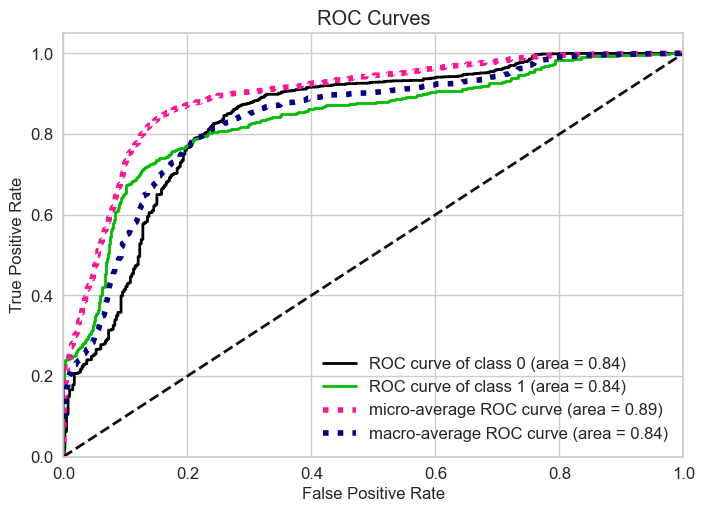

In [209]:
y_pred_proba = nb.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

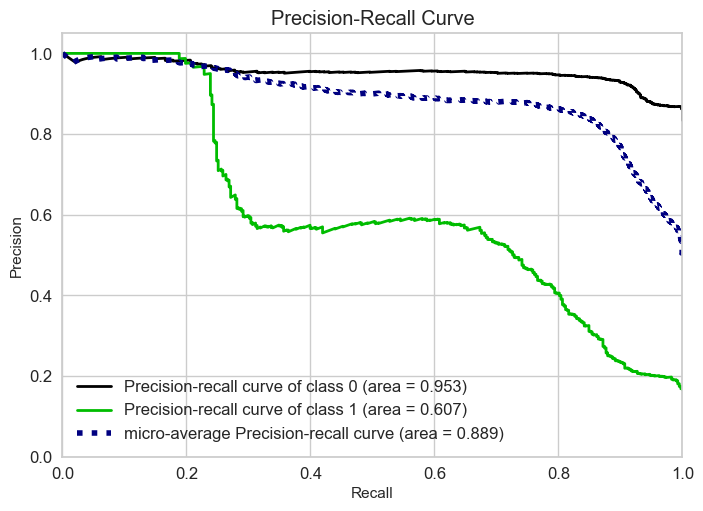

In [210]:
y_pred_proba = nb.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

#### 7- Neural Networks: Deep Learning

In [211]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [213]:
pipeline = Pipeline([
    ("onehot", column_trans),
    ("scaler", StandardScaler()),  
])

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)



In [214]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=tf.keras.metrics.Recall(name='recall'))


In [215]:
early_stop1 = EarlyStopping(monitor = "recall", mode = "max", verbose = 1, patience = 20,restore_best_weights=True)

In [216]:
model.fit(x=X_train_scaled, y=y_train, epochs=200, batch_size=16, validation_split=0.2,callbacks = [early_stop1], verbose=1)

Epoch 1/200
480/480 [==============================] - 4s 3ms/step - loss: 0.4691 - recall: 0.4810 - val_loss: 0.2180 - val_recall: 0.8311
Epoch 2/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2929 - recall: 0.5368 - val_loss: 0.1805 - val_recall: 0.8742
Epoch 3/200
480/480 [==============================] - 1s 2ms/step - loss: 0.2648 - recall: 0.5763 - val_loss: 0.1817 - val_recall: 0.9073
Epoch 4/200
480/480 [==============================] - 1s 2ms/step - loss: 0.2244 - recall: 0.6847 - val_loss: 0.1586 - val_recall: 0.8907
Epoch 5/200
480/480 [==============================] - 1s 2ms/step - loss: 0.2145 - recall: 0.6840 - val_loss: 0.1514 - val_recall: 0.8940
Epoch 6/200
480/480 [==============================] - 1s 2ms/step - loss: 0.2012 - recall: 0.7304 - val_loss: 0.1397 - val_recall: 0.9040
Epoch 7/200
480/480 [==============================] - 1s 2ms/step - loss: 0.1983 - recall: 0.7328 - val_loss: 0.1368 - val_recall: 0.8940
Epoch 8/200
480/480 [======

480/480 [==============================] - 1s 3ms/step - loss: 0.1240 - recall: 0.8582 - val_loss: 0.1065 - val_recall: 0.9238
Epoch 60/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1122 - recall: 0.8722 - val_loss: 0.1131 - val_recall: 0.9272
Epoch 61/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1190 - recall: 0.8753 - val_loss: 0.1084 - val_recall: 0.9238
Epoch 62/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1197 - recall: 0.8598 - val_loss: 0.1052 - val_recall: 0.9238
Epoch 63/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1203 - recall: 0.8683 - val_loss: 0.1036 - val_recall: 0.9238
Epoch 64/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1192 - recall: 0.8683 - val_loss: 0.1028 - val_recall: 0.9205
Epoch 65/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1183 - recall: 0.8737 - val_loss: 0.1068 - val_recall: 0.9205
Epoch 66/200
480/480 [===========

In [217]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
110 0.106   0.878     0.104       0.921
111 0.106   0.876     0.100       0.924
112 0.103   0.884     0.104       0.921
113 0.109   0.884     0.102       0.921
114 0.114   0.868     0.102       0.917

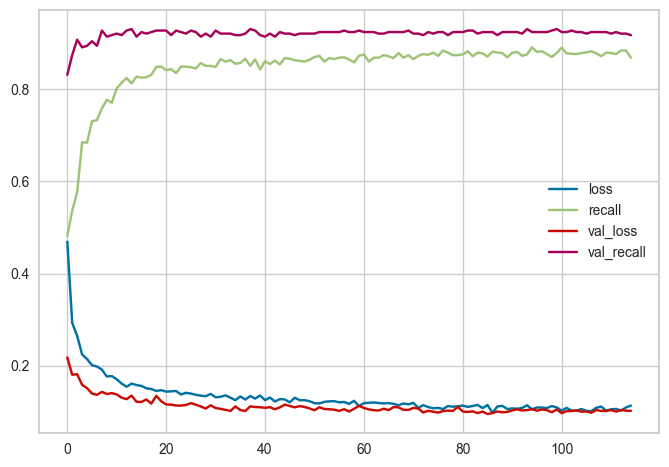

In [218]:
loss_df.plot()
plt.show()

In [219]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

75/75 [==============================] - 0s 1ms/step


In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2001
           1       0.93      0.91      0.92       398

    accuracy                           0.97      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [221]:
# Evaluate the model on the test set
y_pred_proba2 = model.predict(X_train_scaled)
y_pred2 = (y_pred_proba2 >= 0.5).astype(int)

300/300 [==============================] - 0s 1ms/step


In [222]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7999
           1       0.94      0.92      0.93      1593

    accuracy                           0.98      9592
   macro avg       0.96      0.95      0.96      9592
weighted avg       0.98      0.98      0.98      9592



**Hyperparameter optimization using Optuna**

In [223]:
import optuna

In [224]:
# Optuna optimization function
def objective(trial):
    # Define the Keras model function with hyperparameters suggested by Optuna
    def create_model(trial):
        model = Sequential()
        model.add(Dense(trial.suggest_int('neurons_layer1', 32, 256), input_dim=X_train_scaled.shape[1], activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(trial.suggest_uniform('dropout_rate1', 0.0, 0.5)))
        model.add(Dense(trial.suggest_int('neurons_layer2', 32, 128), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(trial.suggest_uniform('dropout_rate2', 0.0, 0.5)))
        model.add(Dense(trial.suggest_int('neurons_layer3', 16, 64), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(trial.suggest_uniform('dropout_rate3', 0.0, 0.5)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(name='recall')])
        return model

    # Split the data into training and validation sets
    X_train_optuna, X_val_optuna, y_train_optuna, y_val_optuna = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Create the Keras model
    model = create_model(trial)

    # Train the model
    model.fit(X_train_optuna, y_train_optuna, epochs=10, batch_size=32, validation_data=(X_val_optuna, y_val_optuna), verbose=0)

    # Evaluate the model on the validation set
    accuracy = model.evaluate(X_val_optuna, y_val_optuna, verbose=0)[1]

    # Return the metric to be optimized (in this case, validation accuracy)
    return accuracy

In [225]:
# Perform the hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-01-09 09:34:11,929] A new study created in memory with name: no-name-1ae46162-0914-4c0f-a31a-76a4fe0e21f9
[I 2024-01-09 09:34:20,247] Trial 0 finished with value: 0.9640437960624695 and parameters: {'neurons_layer1': 120, 'dropout_rate1': 0.4072258948406541, 'neurons_layer2': 76, 'dropout_rate2': 0.41418134965652115, 'neurons_layer3': 35, 'dropout_rate3': 0.1237975108702794}. Best is trial 0 with value: 0.9640437960624695.
[I 2024-01-09 09:34:29,208] Trial 1 finished with value: 0.963001549243927 and parameters: {'neurons_layer1': 193, 'dropout_rate1': 0.27050408972866097, 'neurons_layer2': 118, 'dropout_rate2': 0.398248252199696, 'neurons_layer3': 44, 'dropout_rate3': 0.17951612033909858}. Best is trial 0 with value: 0.9640437960624695.
[I 2024-01-09 09:34:37,638] Trial 2 finished with value: 0.9656071066856384 and parameters: {'neurons_layer1': 200, 'dropout_rate1': 0.018658876547798908, 'neurons_layer2': 43, 'dropout_rate2': 0.2849501592210831, 'neurons_layer3': 33, 'dropout

[I 2024-01-09 09:38:57,728] Trial 26 finished with value: 0.964564859867096 and parameters: {'neurons_layer1': 63, 'dropout_rate1': 0.0017094336668566023, 'neurons_layer2': 85, 'dropout_rate2': 0.2849171663560489, 'neurons_layer3': 30, 'dropout_rate3': 0.1255495283809734}. Best is trial 17 with value: 0.9687337279319763.
[I 2024-01-09 09:39:06,498] Trial 27 finished with value: 0.9682126045227051 and parameters: {'neurons_layer1': 96, 'dropout_rate1': 0.04407625321893632, 'neurons_layer2': 98, 'dropout_rate2': 0.3197102301875314, 'neurons_layer3': 49, 'dropout_rate3': 0.04508724034882262}. Best is trial 17 with value: 0.9687337279319763.
[I 2024-01-09 09:39:15,339] Trial 28 finished with value: 0.9603960514068604 and parameters: {'neurons_layer1': 34, 'dropout_rate1': 0.08158397907978632, 'neurons_layer2': 97, 'dropout_rate2': 0.3917174139398205, 'neurons_layer3': 53, 'dropout_rate3': 0.04312004573971212}. Best is trial 17 with value: 0.9687337279319763.
[I 2024-01-09 09:39:24,482] Tri

In [226]:
# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

Best Parameters: {'neurons_layer1': 76, 'dropout_rate1': 0.06374926458218722, 'neurons_layer2': 93, 'dropout_rate2': 0.26035125384271246, 'neurons_layer3': 30, 'dropout_rate3': 0.02656841233325214}


In [227]:
model = Sequential()
model.add(Dense(48, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.02879688281626241))
model.add(Dense(82, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3076760521710566))
model.add(Dense(37, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.12110277482225325))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=tf.keras.metrics.Recall(name='recall'))


In [228]:
model.fit(x=X_train_scaled, y=y_train, epochs=200, batch_size=16, validation_split=0.2,callbacks = [early_stop1], verbose=1)

Epoch 1/200
480/480 [==============================] - 2s 3ms/step - loss: 0.4204 - recall: 0.5484 - val_loss: 0.2128 - val_recall: 0.7848
Epoch 2/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2640 - recall: 0.6181 - val_loss: 0.1707 - val_recall: 0.8841
Epoch 3/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2305 - recall: 0.6638 - val_loss: 0.1608 - val_recall: 0.9139
Epoch 4/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1974 - recall: 0.7583 - val_loss: 0.1396 - val_recall: 0.8974
Epoch 5/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1871 - recall: 0.7630 - val_loss: 0.1391 - val_recall: 0.9073
Epoch 6/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1753 - recall: 0.7823 - val_loss: 0.1295 - val_recall: 0.8974
Epoch 7/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1666 - recall: 0.7932 - val_loss: 0.1259 - val_recall: 0.9040
Epoch 8/200
480/480 [======

480/480 [==============================] - 1s 3ms/step - loss: 0.1020 - recall: 0.8807 - val_loss: 0.1144 - val_recall: 0.9172
Epoch 60/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0979 - recall: 0.8861 - val_loss: 0.1179 - val_recall: 0.9238
Epoch 61/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1027 - recall: 0.8838 - val_loss: 0.1029 - val_recall: 0.9172
Epoch 62/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0939 - recall: 0.8861 - val_loss: 0.1039 - val_recall: 0.9205
Epoch 63/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0958 - recall: 0.8892 - val_loss: 0.1043 - val_recall: 0.9172
Epoch 64/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1006 - recall: 0.8869 - val_loss: 0.1081 - val_recall: 0.9106
Epoch 65/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0947 - recall: 0.8954 - val_loss: 0.1045 - val_recall: 0.9139
Epoch 66/200
480/480 [===========

480/480 [==============================] - 1s 3ms/step - loss: 0.0847 - recall: 0.9078 - val_loss: 0.1084 - val_recall: 0.9139
Epoch 118/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0866 - recall: 0.8939 - val_loss: 0.1060 - val_recall: 0.9139
Epoch 119/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0819 - recall: 0.9009 - val_loss: 0.1122 - val_recall: 0.9205
Epoch 120/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0830 - recall: 0.9109 - val_loss: 0.1073 - val_recall: 0.9139
Epoch 121/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0736 - recall: 0.9094 - val_loss: 0.1074 - val_recall: 0.9205
Epoch 122/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0836 - recall: 0.9047 - val_loss: 0.1062 - val_recall: 0.9139
Epoch 123/200
480/480 [==============================] - 1s 3ms/step - loss: 0.0822 - recall: 0.8993 - val_loss: 0.1057 - val_recall: 0.9172
Epoch 124/200
480/480 [====

In [229]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
151 0.088   0.900     0.115       0.914
152 0.077   0.913     0.111       0.914
153 0.075   0.908     0.119       0.914
154 0.082   0.900     0.113       0.921
155 0.076   0.907     0.113       0.917

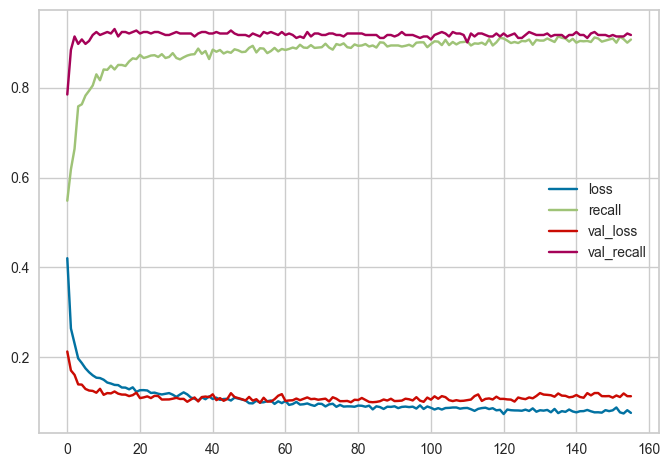

In [230]:
loss_df.plot()
plt.show()

In [231]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

75/75 [==============================] - 0s 1ms/step


In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2001
           1       0.93      0.91      0.92       398

    accuracy                           0.97      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [233]:
# Evaluate the model on the test set
y_pred_proba2 = model.predict(X_train_scaled)
y_pred2 = (y_pred_proba2 >= 0.5).astype(int)

300/300 [==============================] - 0s 1ms/step


In [234]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7999
           1       0.95      0.94      0.94      1593

    accuracy                           0.98      9592
   macro avg       0.97      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



In [235]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

Deep_Learning_f1 = f1_score(y_test, y_pred)
Deep_Learning_acc = accuracy_score(y_test, y_pred)
Deep_Learning_prec = precision_score(y_test, y_pred)
Deep_Learning_recall = recall_score(y_test, y_pred)
Deep_Learning_auc = roc_auc_score(y_test, y_pred)

75/75 [==============================] - 0s 1ms/step


In [236]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

75/75 [==============================] - 0s 1ms/step


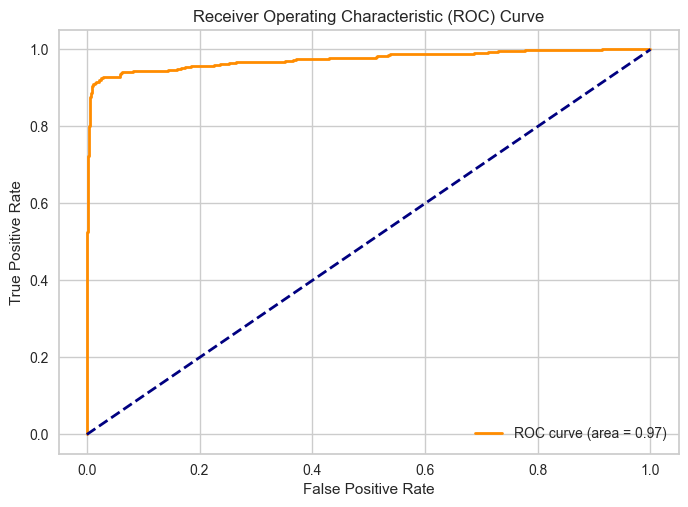

In [237]:
y_pred_proba = model.predict(X_test_scaled)
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

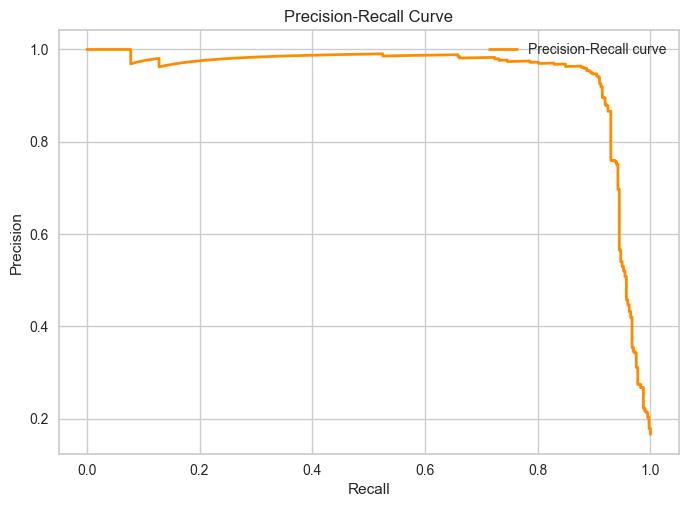

In [238]:
# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

## Model Comparison

In [239]:
compare = pd.DataFrame({"Model": ["Log_Reg","Rand_Forest","Rand_Forest_5", "XGBoost", "LightGBM", "SVM","KNN","Naive_Bayes","Deep_Learning"],
                        "f1_score": [log_reg_f1, random_forest_f1, random_forest5_f1, XGB_f1, LGB_f1,SVM_f1,KNN_f1,Naive_Bayes_f1,Deep_Learning_f1],
                        "accuracy": [log_reg_acc, random_forest_acc, random_forest5_acc, XGB_acc, LGB_acc,SVM_acc,KNN_acc,Naive_Bayes_acc,Deep_Learning_acc],
                        "precision": [log_reg_prec, random_forest_prec, random_forest5_prec, XGB_prec, LGB_prec,SVM_prec,KNN_prec,Naive_Bayes_prec,Deep_Learning_prec],
                        "recall": [log_reg_recall, random_forest_recall, random_forest5_recall, XGB_recall, LGB_recall,SVM_recall,KNN_recall,Naive_Bayes_recall,Deep_Learning_recall],
                        "roc_auc": [log_reg_auc, random_forest_auc, random_forest5_auc, XGB_auc, LGB_auc,SVM_auc,KNN_auc,Naive_Bayes_auc,Deep_Learning_auc]})
compare

Model  f1_score  accuracy  precision  recall  roc_auc
0        Log_Reg     0.562     0.782      0.421   0.844    0.807
1    Rand_Forest     0.954     0.985      0.989   0.922    0.960
2  Rand_Forest_5     0.956     0.986      0.992   0.922    0.960
3        XGBoost     0.951     0.984      0.976   0.927    0.961
4       LightGBM     0.950     0.984      0.971   0.930    0.962
5            SVM     0.902     0.967      0.898   0.907    0.943
6            KNN     0.870     0.955      0.841   0.902    0.934
7    Naive_Bayes     0.604     0.844      0.522   0.716    0.793
8  Deep_Learning     0.920     0.974      0.931   0.910    0.948

In [240]:
compare.sort_values(by="recall", ascending=False)

Model  f1_score  accuracy  precision  recall  roc_auc
4       LightGBM     0.950     0.984      0.971   0.930    0.962
3        XGBoost     0.951     0.984      0.976   0.927    0.961
1    Rand_Forest     0.954     0.985      0.989   0.922    0.960
2  Rand_Forest_5     0.956     0.986      0.992   0.922    0.960
8  Deep_Learning     0.920     0.974      0.931   0.910    0.948
5            SVM     0.902     0.967      0.898   0.907    0.943
6            KNN     0.870     0.955      0.841   0.902    0.934
0        Log_Reg     0.562     0.782      0.421   0.844    0.807
7    Naive_Bayes     0.604     0.844      0.522   0.716    0.793

In [241]:
compare.sort_values(by="roc_auc", ascending=False)

Model  f1_score  accuracy  precision  recall  roc_auc
4       LightGBM     0.950     0.984      0.971   0.930    0.962
3        XGBoost     0.951     0.984      0.976   0.927    0.961
2  Rand_Forest_5     0.956     0.986      0.992   0.922    0.960
1    Rand_Forest     0.954     0.985      0.989   0.922    0.960
8  Deep_Learning     0.920     0.974      0.931   0.910    0.948
5            SVM     0.902     0.967      0.898   0.907    0.943
6            KNN     0.870     0.955      0.841   0.902    0.934
0        Log_Reg     0.562     0.782      0.421   0.844    0.807
7    Naive_Bayes     0.604     0.844      0.522   0.716    0.793

In [242]:
compare.sort_values(by="f1_score", ascending=False)

Model  f1_score  accuracy  precision  recall  roc_auc
2  Rand_Forest_5     0.956     0.986      0.992   0.922    0.960
1    Rand_Forest     0.954     0.985      0.989   0.922    0.960
3        XGBoost     0.951     0.984      0.976   0.927    0.961
4       LightGBM     0.950     0.984      0.971   0.930    0.962
8  Deep_Learning     0.920     0.974      0.931   0.910    0.948
5            SVM     0.902     0.967      0.898   0.907    0.943
6            KNN     0.870     0.955      0.841   0.902    0.934
7    Naive_Bayes     0.604     0.844      0.522   0.716    0.793
0        Log_Reg     0.562     0.782      0.421   0.844    0.807

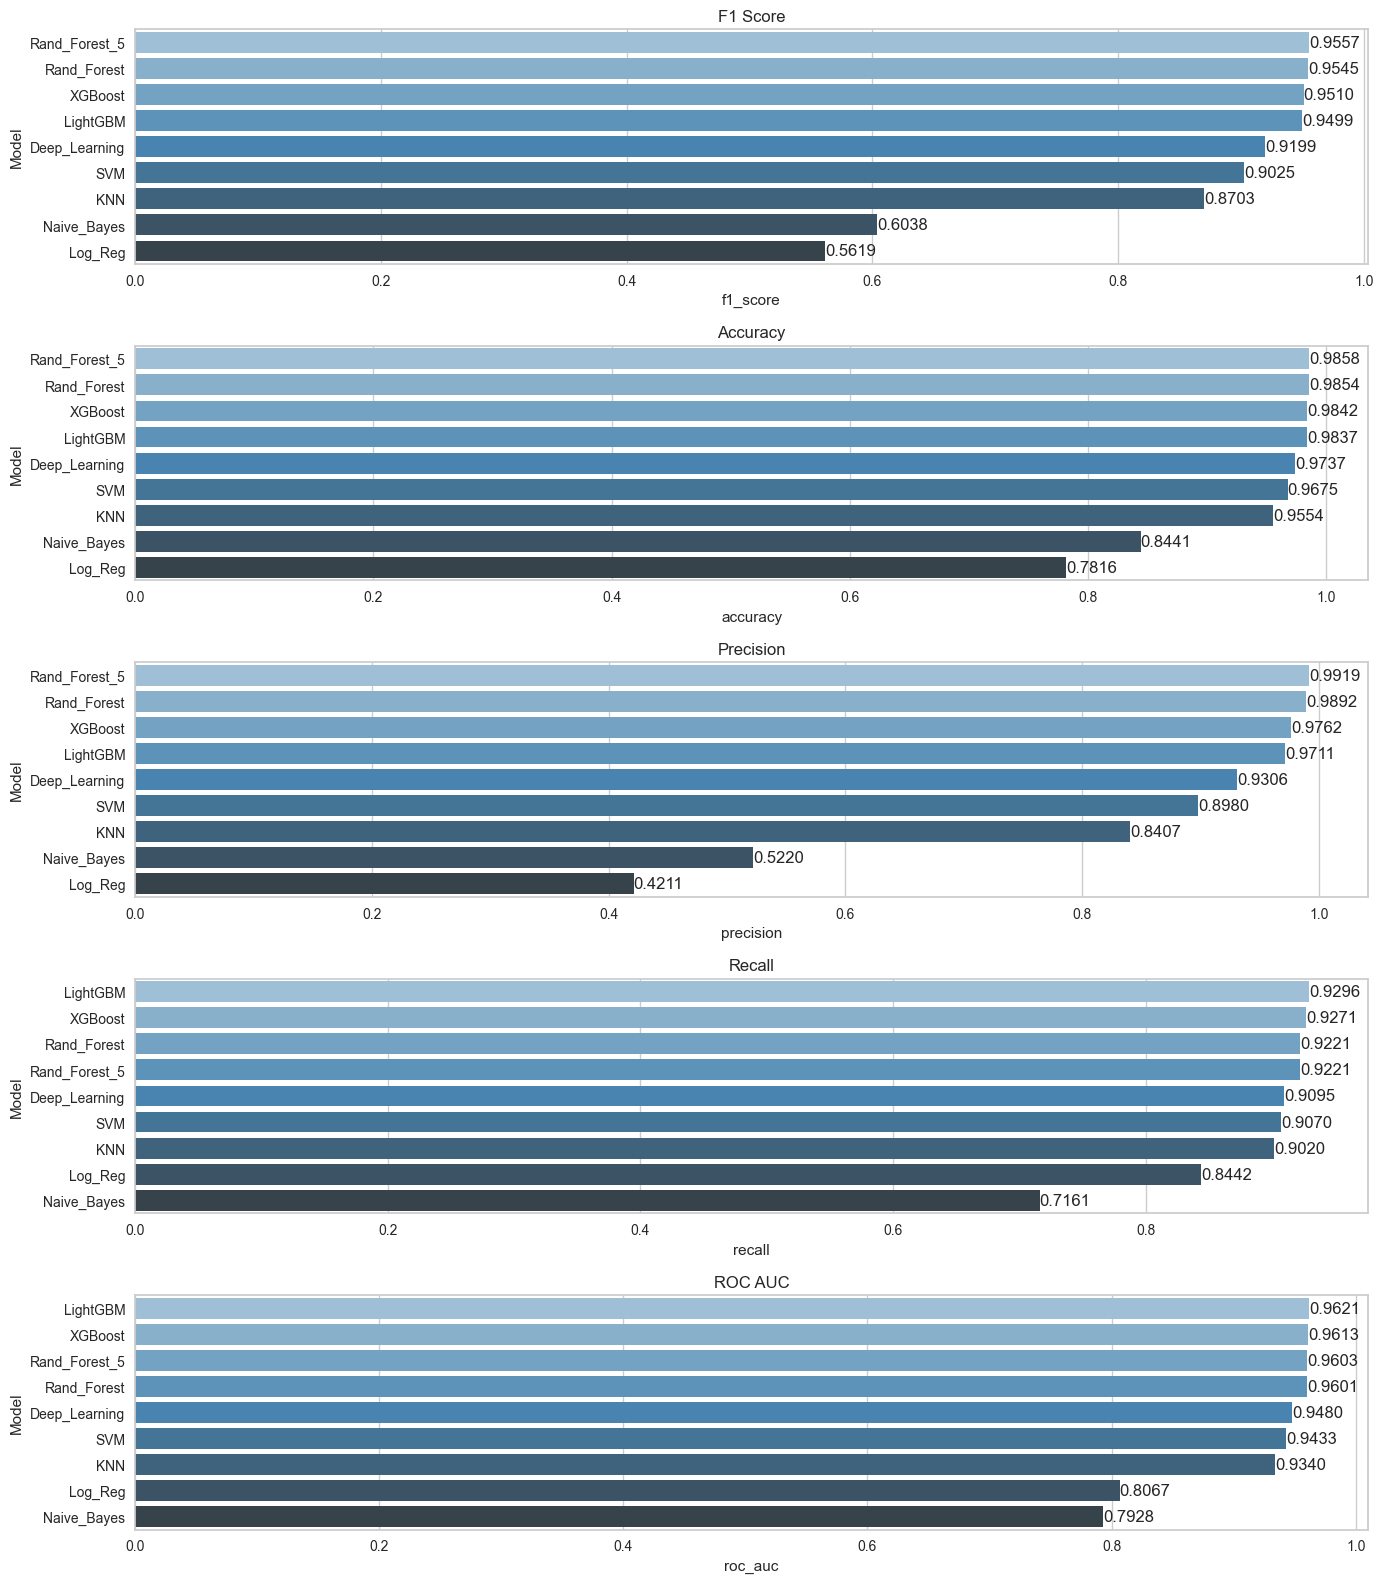

In [243]:
plt.figure(figsize=(14, 16))

# F1 Score
plt.subplot(511)
compare_f1 = compare.sort_values(by="f1_score", ascending=False)
ax = sns.barplot(x="f1_score", y="Model", data=compare_f1, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.title('F1 Score')

# Accuracy
plt.subplot(512)
compare_acc = compare.sort_values(by="accuracy", ascending=False)
ax = sns.barplot(x="accuracy", y="Model", data=compare_acc, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.title('Accuracy')

# Precision
plt.subplot(513)
compare_prec = compare.sort_values(by="precision", ascending=False)
ax = sns.barplot(x="precision", y="Model", data=compare_prec, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.title('Precision')

# Recall
plt.subplot(514)
compare_recall = compare.sort_values(by="recall", ascending=False)
ax = sns.barplot(x="recall", y="Model", data=compare_recall, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.title('Recall')

# roc_auc
plt.subplot(515)
compare_roc_auc = compare.sort_values(by="roc_auc", ascending=False)
ax = sns.barplot(x="roc_auc", y="Model", data=compare_roc_auc, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.title('ROC AUC')

plt.tight_layout()
plt.show()

**I choose Random Forest model with 5 features.**

### Final Model

In [244]:
X5 = X[['satisfaction_level','number_project','time_spend_company','average_montly_hours','last_evaluation']]

In [245]:
# Train the model with all data

In [246]:
operations = [("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(min_samples_split=10,random_state=42))]

final_model = Pipeline(steps=operations)
final_model.fit(X5, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(min_samples_split=10,
                                        random_state=42))])

In [247]:
# Evaluate the model on the test set
y_predicted = final_model.predict(X5)
print(classification_report(y,y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10000
           1       0.99      0.92      0.96      1991

    accuracy                           0.99     11991
   macro avg       0.99      0.96      0.97     11991
weighted avg       0.99      0.99      0.99     11991



## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [248]:
import joblib

In [249]:
# Save the model
joblib.dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [250]:
# Load the model
loaded_model = joblib.load('final_model.joblib')

In [251]:
# Example for prediction
data = [[0.7, 4, 3, 160, 0.9]]
prediction = loaded_model.predict(data)
print("Prediction:", prediction)

Prediction: [0]


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___